# Feature Detection, Matching, Segmentation

Nina Miolane, UC Santa Barbara

<center><img src="figs/03_main2.png" width=800px alt="default"/></center>


# Last Lectures

- **01: Image Formation Models (Ch. 2)**
- **02: Image Operators and Transforms (Ch. 3)**
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We have seen:
- how 2D images are acquired from a 3D scene,
- once acquired, which operations we can perform on them.

# This Lecture

- 01: Image Formation Models (Ch. 2)
- 02: Image Operators and Transforms (Ch. 3)
- **03: Feature Detection, Matching, Segmentation (Ch. 7)**
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We will start using image processing tools, to:
- extract meaningful features from images,
- match features from pairs of images.

<center><img src="figs/03_main.png" width=300px alt="default"/></center>

# Vocabulary:

$\color{#EF5645}{\text{Features}}$ are characteristics extracted from the image such as points, edges, contours, lines, etc.

$\color{#EF5645}{\text{Matching}}$, also called alignment, correspondence, or registration, is the process of finding which features in one image are also present in another image.

<center><img src="figs/03_main2.png" width=700px alt="default"/></center>


Consider the two pairs of images shown in the Figure.

For the first pair:
- align the two images so that they can be seamlessly stitched into a composite mosaic?

For the second pair:
- establish a dense set of correspondences so that a 3D model can be constructed?

$\rightarrow$ what kinds of features should you detect and then match?


# Feature Detection, Matching, Segmentation

- **[Point and Patches](#sec-syllabus)**

- [Edges and Contours](#sec-ece)

- [Contour Tracing](#sec-ece)

- [Segmentation](#sec-ece)

# Keypoints and Keypoint Descriptors

$\color{#EF5645}{\text{Keypoints}}$, also called interest points or sometimes corners, are specific locations in the images such as mountain peaks, building corners, doorways, organ's anatomical landmarks, etc.

<center><img src="figs/03_faces.png" width=500px alt="default"/></center>

$\color{#EF5645}{\text{A keypoint descriptor}}$ is a vector that describes the appearance of the pixel patch around the keypoint. 

$\color{#047C91}{\text{Example}}$: Histogram of the intensities present around this keypoint.

# Why Keypoints and Descriptors?

- Object/people recognition (pre-deep learning or with small datasets). 
- Finding corresponding keypoints in different images is useful for stitching, compute camera pose, perform 3D reconstruction.
    
<center><img src="figs/03_faces.png" width=600px alt="default"/></center>

# Keypoints Detection and Matching

Three steps:
- **Feature detection: Find keypoint location**
- Feature description: Compute keypoint descriptor
- Feature matching: Find corresponding keypoints in a pair of images

<center><img src="figs/03_pipeline.png" width=500px alt="default"/></center>

# Detection: Intuition

$\color{#EF5645}{\text{Goal}}$: Find keypoints, i.e. specific image locations that:
- **are easy to recognize and track,**
- will be helpful to perform matching between images.

<center><img src="figs/03_point_detection.png" width=800px alt="default"/></center>



# Detection: Intuition

<center><img src="figs/03_point_detection.png" width=600px alt="default"/></center>

$\color{#EF5645}{\text{Conclusion}}$: Contrast changes, i.e. gradients, are important:
- texture-less patches are almost impossible to localize,
- patches with large contrast changes (gradients) are easier,
- patches with gradient in at least two directions are the easiest.

# Detection: Intuition

$\color{#EF5645}{\text{Goal}}$: Find keypoints, i.e. specific image locations that:
- are easy to recognize and track,
- **will be helpful to perform matching between images.**

<center><img src="figs/03_invariance_geometry.png" width=450px alt="default"/></center>

$\color{#EF5645}{\text{Conclusion}}$: 
- Need invariance wrt geometric transformations or camera poses.

# Detection: Intuition

$\color{#EF5645}{\text{Goal}}$: Find keypoints, i.e. specific image locations that:
- are easy to recognize and track,
- **will be helpful to perform matching between images.**

<center><img src="figs/03_invariance_colors.png" width=800px alt="default"/></center>

$\color{#EF5645}{\text{Remarks}}$: 
- Need invariance with respect to lightning variations, coloring, noise, blur.

# Feature Detection: Desiderata

- Patch extraction needs to be repeatable and accurate
  - Invariant to translation, rotation, scale changes
  - Robust or covariant to out-ot-plane (affine) transformations
  - Robust to lighning variations, color histograms, noise or blur
- Quantity: Need a sufficient number of patches to cover the object
- Distinctiveness: Patch should contain interesting structure
- Efficiency: Fast enough to run in real-time

# Many Detectors Available

- Hessian & Harris [Beaudet '78][Harris '88]
- Laplacian, DoG [Lindeberg '98][Lowe '99]
- Harris-/Hessian-Laplace [Mikolajczyk & Schmid '01]
- Harris-/Hessian-Affine [Mikolajczyk & Schmid '04]
- EBR and IBR [Tuytelaarss & Van Gool '04]
- MSER [Matas '02]
- Salient Regions [Kadir & Brady '01]
- Many others...

= Basic building blocks for many applications. We will see some of them.


# Harris Detector

$\color{#6D7D33}{\text{Intuition}}$: 
- If we shift a small window around keypoint, its content change radically.

<center><img src="figs/03_harris.png" width=400px alt="default"/></center>

$\color{#6D7D33}{\text{Math}}$:  Change of intensity for shift $(u, v)$ in image $I$:
$$ E_{AC}(u, v) = \sum_{x, y} w(x, y) \left( I(x+u, y+v) - I(x, y)\right)^2,$$
- where $w$ are weights, also called the window function,
- $E_{AC}$ is known as the auto-correlation function.

# Approximation

Using a Taylor expansion: $I(x +u, y +v) \simeq I(x, y) + \nabla I (x, y)^T (u, v)$ we get:
$$\begin{align*}
E_{AC}(u, v)
&= \sum_{x, y} w(x, y) \left( I(x+u, y+v) - I(x, y)\right)^2 \\
&\simeq \sum_{x, y} w(x, y) \left( I(x, y) + \nabla I (x, y)^T (u, v) - I(x, y)\right)^2 \\
&= \sum_{x, y} w(x, y) \left(\nabla I (x, y)^T (u, v)\right)^2 \\
&= \sum_{x, y} w(x, y)  (u, v)^T \nabla I (x, y) \nabla I (x, y)^T (u, v)\\
&= (u, v)^T A(x, y) (u, v),
\end{align*}$$
where $A$ is the $\color{#EF5645}{\text{auto-correlation matrix}}$: $A = \sum_{x, y} w(x, y) \begin{bmatrix} I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}$.

# Gradients of images

$\color{#EF5645}{\text{The gradient}}$ of the image $I$, written: 
$$\nabla I (x, y) = (I_x, I_y)(x, y) = \left(\frac{\partial I}{\partial x},\frac{\partial I}{\partial y} \right)(x, y), $$
is computed as:
- $\frac{\partial I}{\partial x}(x, y) = \lim_{dx \rightarrow 0} \frac{I(x + dx, y) - I(x, y)}{dx} \simeq \frac{I(x+1, y) - I(x-1,y)}{2}$
- $\frac{\partial I}{\partial y}(x, y) = \lim_{dy \rightarrow 0} \frac{I(x, y+dy) - I(x, y)}{dy} \simeq \frac{I(x, y+1) - I(x, y-1)}{2}$

<center><img src="figs/03_gradients.png" width=900px alt="default"/></center>

# $A$ for Axis-Aligned Corner

$\color{#047C91}{\text{Example}}$:  Axis-aligned corner.

<center><img src="figs/03_axis_aligned_corner.png" width=130px alt="default"/></center>

- The auto-correlation matrix $A$ writes, for some $\lambda_x, \lambda_y$:
$$A 
= \sum_{x, y} w(x, y) \begin{bmatrix} I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}
= \begin{bmatrix}  \sum_{x, y} w(x, y) I_x^2 & \sum_{x, y} w(x, y)  I_x I_y \\ \sum_{x, y} w(x, y)  I_x I_y & \sum_{x, y} w(x, y)  I_y^2 \end{bmatrix}
= \begin{bmatrix} \lambda_x & 0 \\ 0 & \lambda_y \end{bmatrix}.$$


- Conversely, if $A$ is diagonal with large $\lambda$'s, there is an axis-aligned corner. 

# General A

Corners might not be axis-aligned.

<center><img src="figs/03_rotated_corner.jpg" width=200px alt="default"/></center>

- Since $A$ is symmetric, write eigenvalues decomposition (spectral theorem):
$$A 
= \begin{bmatrix}  \sum_{x, y} w(x, y) I_x^2 & \sum_{x, y} w(x, y)  I_x I_y \\ \sum_{x, y} w(x, y)  I_x I_y & \sum_{x, y} w(x, y)  I_y^2 \end{bmatrix}
= R^{-1} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} R,$$
for a rotation matrix $R$.

# Visualization of $A$

The eigenvalue decomposition of  $A$ allows us to visualize it as an ellipse:
- with axis lengths determined by the eigenvalues,
- with orientation determined by $R$, i.e. the eigenvectors.

<center><img src="figs/03_ellipse.png" width=700px alt="default"/></center>

# Classification of Image Locations with $A$

 Computing $A(x, y)$ for each location $(x, y)$:
- allows us to classify the type of points $(x, y)$ we are looking at.

<center><img src="figs/03_eigenvalues.png" width=750px alt="default"/></center>

However, computing an eigenvalue decomposition is computationally expensive.

# Corner Response Function $\theta$

Using determinant and trace of $A$: 
- gives us insights on the eigenvalues, without having to compute them.

$\color{#EF5645}{\text{The Corner Response Function}}$ is defined as:
$$\theta = \det(A) - \alpha \text{trace} (A)^2 = \lambda_1 \lambda_2 - \alpha (\lambda_1 + \lambda_2)^2.$$

$\color{#EF5645}{\text{Remarks}}$:
- Compute $\theta$ at each $(x, y)$.
- Constant $\alpha$ often taken between 0.04 and 0.06

# Harris Detector: Window Function $w$?

$\color{#EF5645}{\text{Recall}}$: The autocorrelation matrix $A$ depends on the choice of window function $w$:

$$A 
= \begin{bmatrix}  \sum_{x, y} w(x, y) I_x^2 & \sum_{x, y} w(x, y)  I_x I_y \\ \sum_{x, y} w(x, y)  I_x I_y & \sum_{x, y} w(x, y)  I_y^2 \end{bmatrix}.$$

$\color{#EF5645}{\text{Options for $w$:}}$ : Uniform window or smooth window with Gaussian kernel
<center><img src="figs/03_window.png" width=800px alt="default"/></center>


# Choose Window Function $w$?

- Option 1: Uniform window
  - $A = \sum_{x, y \text{ in window}} \begin{bmatrix}  I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}$
  - Problem: not rotation invariant
  
- Option 2: Smooth with Gaussian Kernel
  - $A = g * \begin{bmatrix}  I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}$
  - Rotation invariant: better!
  

$\color{#EF5645}{\text{Remark:}}$ The corner response function with Gaussian window $w$ writes:

$$\theta = g(I_x^2)g(I_y^2) - (g(I_x I_y))^2 - \alpha \left( g(I_x^2)+g(I_y^2)\right)^2.$$

# In practice: Harris Detector [Harris'88]

1. Compute $\theta$ on the image
2. Select point $(x, y)$ where:
- $\theta(x, y) >$ threshold



<center><img src="figs/03_summary_harris.png" width=350px alt="default"/></center>

<center><img src="figs/03_theta.png" width=350px alt="default"/></center>




In [66]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

# Example: Create an Image

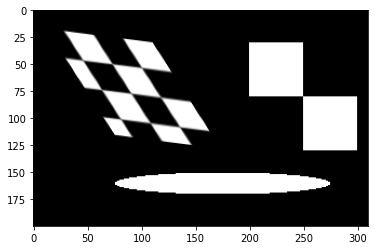

In [70]:
image_geom = data.checkerboard()[:90, :90]

# # Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7, translation=(110, 30))
image_geom = warp(image_geom, tform.inverse, output_shape=(200, 310))

# Ellipse
rr, cc = ellipse(160, 175, 10, 100)
image_geom[rr, cc] = 1

# Two squares
image_geom[30:80, 200:250] = 1; image_geom[80:130, 250:300] = 1

fig, ax = plt.subplots()
ax.imshow(image_geom, cmap=plt.cm.gray);

# Example: Compute $\theta$

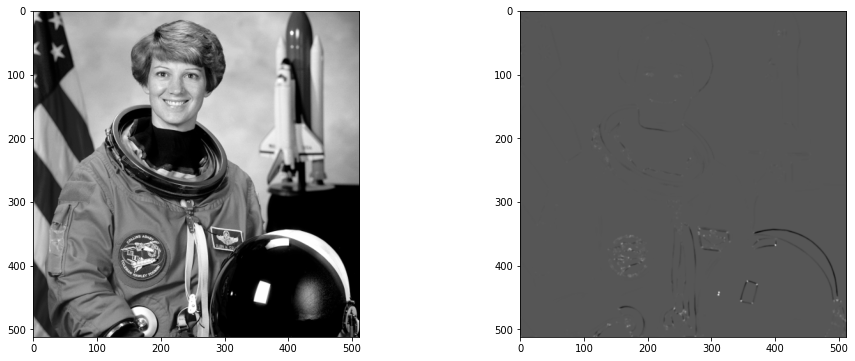

In [84]:
image = rgb2gray(data.astronaut())
#image = image_geom
thetas = corner_harris(image)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
axes[0].imshow(image, cmap=plt.cm.gray);
axes[1].imshow(thetas, cmap=plt.cm.gray);

# Example: Find Local Maxima of $\theta$

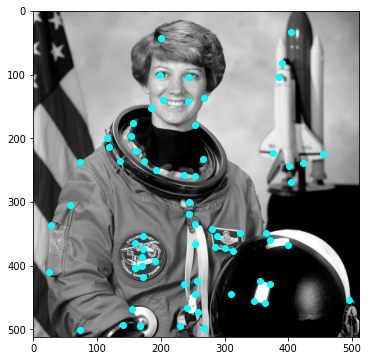

In [85]:
coords = corner_peaks(corner_harris(image), min_distance=10, threshold_rel=0.02)
#print(coords)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(
    coords[:, 1], coords[:, 0], # NB: coordinates are inverted!
    color='cyan', marker='o',linestyle='None', markersize=6)
plt.show()

# An Alternative: Hessian Detector

$\color{#EF5645}{\text{The Hessian}}$ of image $I$ is the matrix of the second derivatives of $I$:
$$H(I)(x, y) = \begin{bmatrix} I_{xx} & I_{xy} \\ I_{xy} & I_{yy} \end{bmatrix}.$$


$\color{#EF5645}{\text{Hessian Detector}}$ searches for strong derivatives in both $x$ and $y$ directions.
- Compute $\det H(I)  = I_{xx}I_{yy} - I_{xy}^2$
- Select point $(x, y)$ where:
  - $\det H(I)(x, y) >$ threshold.

<center><img src="figs/03_hessian.png" width=350px alt="default"/></center>

- Compute $\det H(I)(x, y)$

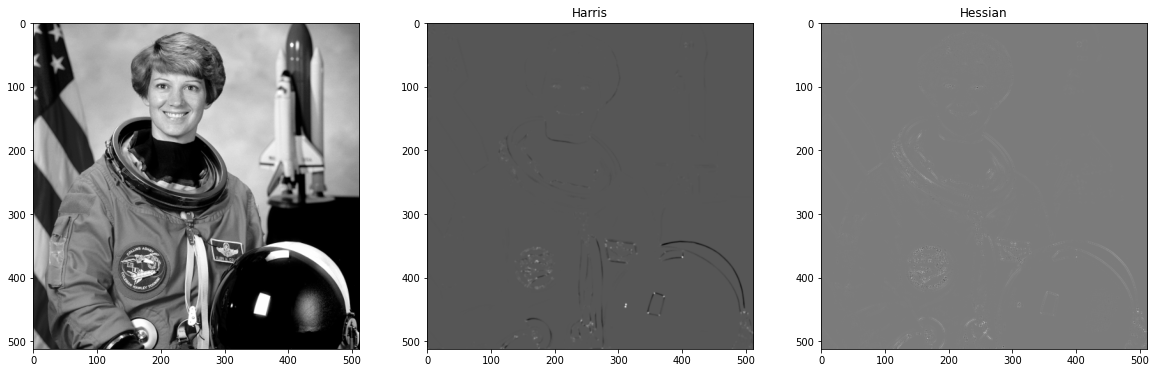

In [95]:
from skimage.feature import hessian_matrix_det

image = rgb2gray(data.astronaut())
#image = image_geom

thetas = corner_harris(image)
dets = hessian_matrix_det(image)

fig, axes = plt.subplots(ncols=3, figsize=(20, 6))
axes[0].imshow(image, cmap=plt.cm.gray);
axes[1].imshow(thetas, cmap=plt.cm.gray); axes[1].set_title("Harris")
axes[2].imshow(-dets, cmap=plt.cm.gray); axes[2].set_title("Hessian");

- Select point $(x, y)$ where $\det H(I)(x, y) >$ threshold.

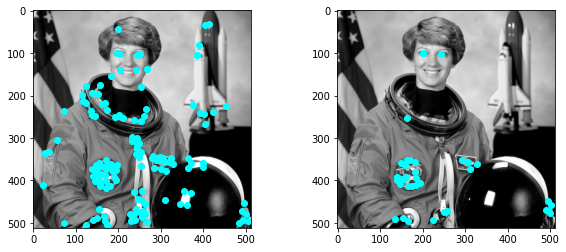

In [97]:
coords_harris = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)
coords_hessian = corner_peaks(hessian_matrix_det(image), min_distance=5, threshold_rel=0.2)

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].plot(
    coords_harris[:, 1], coords_harris[:, 0], 
    color='cyan', marker='o', linestyle='None', markersize=6)
ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].plot(
    coords_hessian[:, 1], coords_hessian[:, 0],
    color='cyan', marker='o', linestyle='None', markersize=6)
plt.show()

# Another Alternative: Difference of Gaussians (DoG)

$\color{#EF5645}{\text{Recall}}$: one step of the Laplacian pyramid: difference of Gaussians.

- Compute: $DoG(x, y) = g_\sigma^L * I - g_\sigma^H * I$
- Select point $(x, y)$:
  - for $DoG(x, y) >$ threshold

<center><img src="figs/02_laplace_block.png" width=300px alt="default"/></center>

In [98]:
from skimage.filters import difference_of_gaussians

- Compute $DoG(x, y)$
- Select points $(x, y)$ such that $DoG(x, y) >$ threshold

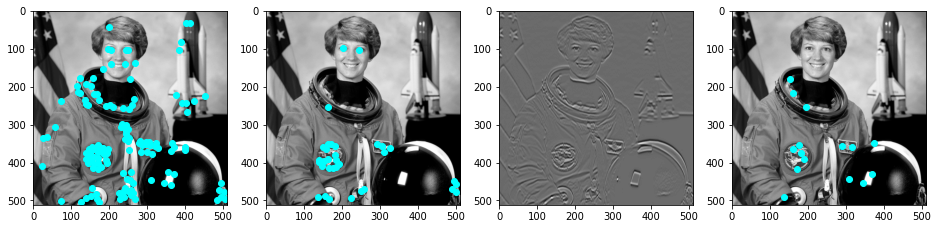

In [104]:
diff_of_g = difference_of_gaussians(image=image, low_sigma=2, high_sigma=2.6, channel_axis=-1)
coords_dog = corner_peaks(diff_of_g, min_distance=10, threshold_rel=0.6)

fig, ax = plt.subplots(ncols=4, figsize=(16, 4))
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].plot(coords_harris[:, 1], coords_harris[:, 0],
           color='cyan', marker='o', linestyle='None', markersize=6)
ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].plot(coords_hessian[:, 1], coords_hessian[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax[2].imshow(diff_of_g, cmap=plt.cm.gray)
ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].plot(coords_dog[:, 1], coords_dog[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
plt.show()

# Invariances

Harris and Hessian are invariant to:
- Illumination changes
- Translation
- Rotation

But not to scaling.


<center><img src="figs/03_scal.png" width=800px alt="default"/></center>

# Towards Detectors that are Scale Invariant

Consider regions (e.g. circles) of different sizes around a point in the image:
- Regions of corresponding sizes will look the same in both images
- How to find corresponding circles, independently in both images?

<center><img src="figs/03_scal_inv.png" width=400px alt="default"/></center>

$\rightarrow$ Go multiscale with pyramids.

# Naive Scale Invariant Detection

Consider two images:
- Compute Gaussian pyramid of both 
- Performing N × N pairwise comparisons to find the best match. 

<center><img src="figs/03_gaussian_pyr.png" width=550px alt="default"/></center>

But too expensive to be of practical use.

# Scale-Invariant Detection

$\color{#6D7D33}{\text{Solution}}$: Compute "scale-invariant" keypoint directly from __one__ image:
- Define a function $f$ on the region (circle) which is "scale-invariant":
  - Same for corresponding regions even if they are at different scales, e.g.: average intensity
  - For point $(x, y)$: $f_{x, y}$ is function of region size (circle radius).
- For each $(x, y)$, find local maximum of $f$. If maximum: keypoint!

$\rightarrow$ Region size, for which the maximum is achieved, is invariant to image scale.

<center><img src="figs/03_scal_inv_function.png" width=800px alt="default"/></center>

# Good $f$ for Scale Invariant Detection?

= function that has one stable sharp peak, e.g.  that responds to contrast (sharp local intensity changes): gradients!

<center><img src="figs/03_scal_inv_options.png" width=1600px alt="default"/></center>

# Scale Invariant Detector with Laplacian Pyramid

Laplacian Pyramid: take $f$ to be the difference of Gaussians at each level

<center><img src="figs/03_ateachpoint.png" width=400px alt="default"/></center>

# Example: Consider a Keypoint

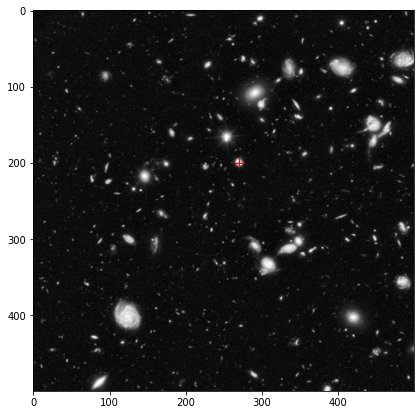

In [107]:
x0, y0 = 270, 200 #123, 401 #270, 200 
image = rgb2gray(data.hubble_deep_field()[0:500, 0:500])
fig, ax = plt.subplots(1, 1, figsize=(7,7))

ax.imshow(image, cmap=plt.cm.gray)
ax.plot(x0, y0, color="red", marker="+", markersize=10);

# Compute Laplace Pyramid

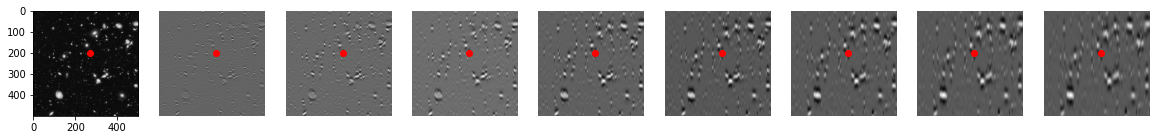

In [108]:
import numpy as np

image_pyramid = []
sigmas = np.arange(1, 16, 2)

fig, axes = plt.subplots(ncols=len(sigmas)+1, figsize=(20, 6))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].plot(x0, y0, color="red", marker="o");
for i, sigma in enumerate(sigmas):
    diff_of_g = difference_of_gaussians(
        image=image, low_sigma=sigma, high_sigma=sigma+2, channel_axis=-1)
    axes[i+1].imshow(diff_of_g, cmap=plt.cm.gray)
    axes[i+1].plot(x0, y0, color='red', marker='o', linestyle='None', markersize=6)
    axes[i+1].axis("off")
    image_pyramid.append(diff_of_g)

# Visualize $f$ at the Keypoint

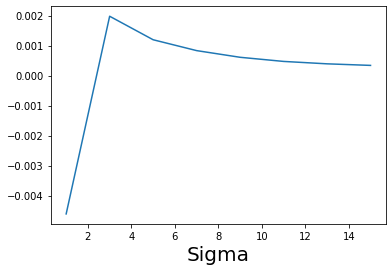

In [109]:
plt.plot(sigmas, [el[x0, y0] for el in image_pyramid])
plt.xlabel("Sigma", fontsize=20);

# Keypoint's Characteristic Scale

$\color{#EF5645}{\text{The characteristic scale}}$ is the scale that produces the peak of response in DoG.

<center><img src="figs/03_scale.png" width=800px alt="default"/></center>

# Scale Invariant Detectors


<center><img src="figs/03_detectors.png" width=950px alt="default"/></center>



$\color{#EF5645}{\text{Remark}}$: Laplacian pyramid that we introduced with DoG:
- only a fast approximation of the true Laplacian Pyramid.



# Summary: Scale Invariant Detection

- $\color{#6D7D33}{\text{Given}}$: Two images of the same scene with a large scale  difference between them.

- $\color{#6D7D33}{\text{Goal}}$: Find the same keypoints independently in each image. 

- $\color{#6D7D33}{\text{Solution}}$:  Search for maxima of suitable $f$ in scale and in space.

- Two strategies...
  - Laplacian‐of‐Gaussian (LoG) 
  - Difference‐of‐Gaussian (DoG) as a fast approximation 

...used on their own or with single-scale keypoint detectors (Harris, Hessian)


# Keypoints Detection and Matching

Three steps:
- Feature detection: Find keypoint location
- **Feature description: Compute keypoint descriptor**
- Feature matching: Find corresponding keypoints in a pair of images

<center><img src="figs/03_pipeline.png" width=500px alt="default"/></center>

# Intensity Patches (normalized)

$\color{#EF5645}{\text{Intensity patches}}$, normalized for 0 mean and 1 standard deviation, can sometimes perform reasonable, if the two images are not too different.


<center><img src="figs/03_MOPS.png" width=400px alt="default"/></center>


$\color{#EF5645}{\text{Remarks}}$: In most cases, however:
- the local appearance of features will change in orientation and scale, or affine deformations. 

$\rightarrow$ Keypoint descriptor should also be invariant to transformations!

# SIFT Descriptor

SIFT Descriptor = Scale-Invariant Feature Transform Descriptor

$\color{#6D7D33}{\text{Method}}$:
1. Compute image gradient at each pixel in a 16 x 16 window:
  - around the key point $(x, y)$, 
  - at the characteristic scale of keypoint $(x, y)$.

<center><img src="figs/03_sift_descriptor.png" width=600px alt="default"/></center>


# SIFT Descriptor

$\color{#6D7D33}{\text{Method}}$:

2. Downweight gradients' magnitude with Gaussian weights:
  - reduce influence of gradients far from keypoint $(x, y)$

<center><img src="figs/03_sift_descriptor.png" width=800px alt="default"/></center>


# SIFT Descriptor

$\color{#6D7D33}{\text{Method}}$:

3. In each 4 x 4 quadrant, form a gradient orientation histogram:
  - i.e. add the (weighted) gradient values into 8 bins
  
 <center><img src="figs/03_sift_descriptor.png" width=800px alt="default"/></center>

# SIFT Descriptor

$\color{#6D7D33}{\text{Method}}$:

4. Stack 4x4 array of eight-bin histogram, and normalize to get unit-norm
  - SIFT descriptor = unit vector of 128 non-negative values
  
 <center><img src="figs/03_sift_descriptor.png" width=600px alt="default"/></center>

$\color{#EF5645}{\text{Remark}}$: Many variants exist: PCA-Sift, RootSIFT, etc.

# Keypoints Detection and Matching

Three steps:
- Feature detection: Find keypoint location
- Feature description: Compute keypoint descriptor
- **Feature matching: Find corresponding keypoints in a pair of images**

<center><img src="figs/03_pipeline.png" width=500px alt="default"/></center>

# Matching

$\color{#EF5645}{\text{Matching}}$ means to determine which features come from corresponding locations in different images.

Approach depends on the application, but has two components:
- matching strategy (match versus no match),
- efficient algorithm ot perform matching as fast as possible.

# Matching Assumptions

Assume that:
- Descriptors are vectors of the same length $D_1, D_2, ...$, e.g. SIFT descriptors
- Descriptors can be compared w. Euclidean distance: $||D_1 - D_2||$ small means:
  - patches around descriptors $D_1, D_2$ are similar
  - this is a potential match!
 

# Matching Strategy

$\color{#6D7D33}{\text{Method}}$: Set a threshold, and:
- For each image:
    - For each descriptor $D$ in this image:
        - compute Euclidean distance between $D$ and all descriptors $D'$ of all other images
        - If $||D - D'||$  < threshold: potential match!
        
$\color{#EF5645}{\text{Remark}}$: Other methods exist when the number of images is large: large-scale matching.


# Matching Errors

$\color{#EF5645}{\text{Remarks}}$:
- Threshold too high: lots of false positives
- Threshold too low: lots of false negatives

<center><img src="figs/03_matching.png" width=1000px alt="default"/></center>

# Matching Evaluation

$\color{#EF5645}{\text{The confusion matrix}}$: is a good tool to evaluate if the matching worked.

<center><img src="figs/03_confusion.png" width=1200px alt="default"/></center>

# Example: Matching with SIFT

In [110]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

# Example: Generate 3 Images

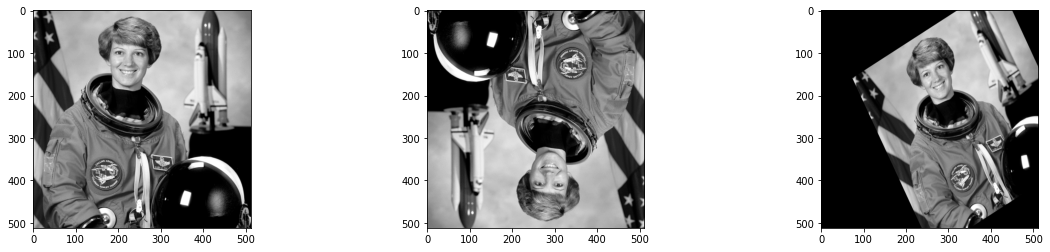

In [58]:
img1 = rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img3 = transform.warp(img1, tform)

fig, axes = plt.subplots(ncols=3, figsize=(20, 4))
axes[0].imshow(img1, cmap=plt.cm.gray)
axes[1].imshow(img2, cmap=plt.cm.gray)
axes[2].imshow(img3, cmap=plt.cm.gray);

# Example: Extract SIFT descriptors

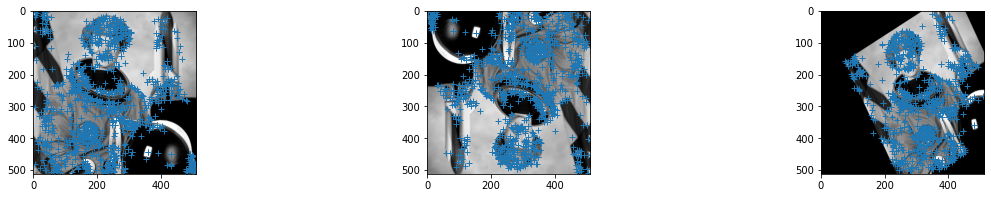

In [114]:
descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

fig, axes = plt.subplots(ncols=3, figsize=(20, 3))
axes[0].imshow(img1, cmap=plt.cm.gray); axes[0].plot(keypoints1[:, 1], keypoints1[:, 0], marker="+", linestyle='None')
axes[1].imshow(img2, cmap=plt.cm.gray); axes[1].plot(keypoints2[:, 1], keypoints2[:, 0], marker="+", linestyle='None')
axes[2].imshow(img3, cmap=plt.cm.gray); axes[2].plot(keypoints3[:, 1], keypoints3[:, 0], marker="+", linestyle='None');

# Example: Match Descriptors

In [62]:
matches12 = match_descriptors(
    descriptors1, descriptors2, max_ratio=0.6, cross_check=True)
matches13 = match_descriptors(
    descriptors1, descriptors3, max_ratio=0.6, cross_check=True)

# Example: Plot the Results

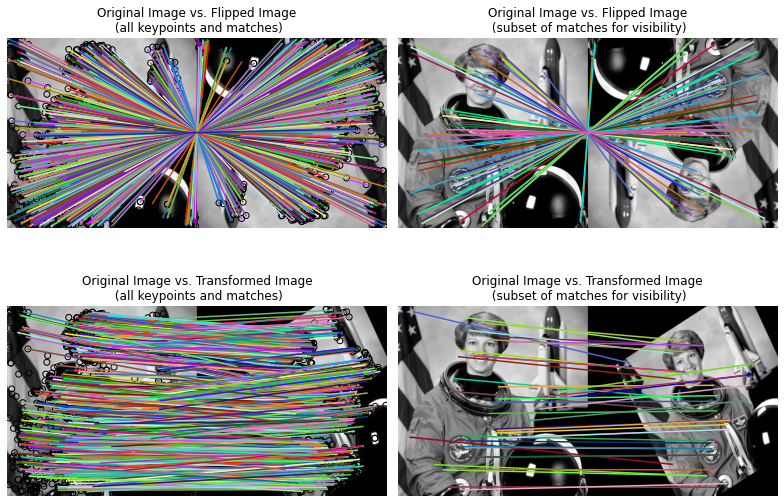

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8)); plt.gray()
plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
ax[0, 0].axis('off'); ax[0, 0].set_title("Original Image vs. Flipped Image\n (all keypoints and matches)")
plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
ax[1, 0].axis('off'); ax[1, 0].set_title("Original Image vs. Transformed Image\n (all keypoints and matches)")
plot_matches(ax[0, 1], img1, img2, keypoints1, keypoints2, matches12[::15], only_matches=True)
ax[0, 1].axis('off'); ax[0, 1].set_title("Original Image vs. Flipped Image\n (subset of matches for visibility)")
plot_matches(ax[1, 1], img1, img3, keypoints1, keypoints3, matches13[::15], only_matches=True)
ax[1, 1].axis('off'); ax[1, 1].set_title("Original Image vs. Transformed Image\n (subset of matches for visibility)")
plt.tight_layout(); plt.show()

# Feature Detection, Matching, Segmentation

- [Point and Patches](#sec-syllabus)

- **[Edges and Contours](#sec-ece)**

- [Contour Tracking](#sec-ece)

- [Segmentation](#sec-ece)

# Why Edges and Contours?

Last lecture: $\color{#EF5645}{\text{Keypoints}}$:
- Find image locations that can be accurately matched.
- No semantic information, no understanding of the image scene.


<center><img src="figs/03_main2.png" width=700px alt="default"/></center>


# Why Edges and Contours?


This lecture: $\color{#EF5645}{\text{Edges and Contours}}$:
- Find semantic information, as edges correspond to:
  - discontinuities in depth (different objects),
  - discontinuities in surface orientation (shapes of objects),
  - changes in material properties (texture of objects), etc.
- Reduce the amount of data to be processed for image interpretation
    - filter out irrelevant information, keep important structural properties 

$\color{#047C91}{\text{Example}}$: Young children easily recognize familiar objects by line drawings.
  
  
<center><img src="figs/03_human_edges_notxt.jpg" width=520px alt="default"/></center>

# Why Edges and Contours?

$\color{#047C91}{\text{Applications of Edges and Contours Detection}}$:
- Finger print matching
- Medical imaging diagnosis
- License plate detection

<center><img src="figs/03_prints.jpeg" width=600px alt="default"/></center>

# Why Edges and Contours?

$\color{#047C91}{\text{Applications of Edges and Contours Detection}}$:
- Finger print matching
- Medical imaging diagnosis
- License plate detection

<center><img src="figs/03_medical.jpeg" width=700px alt="default"/></center>

# Why Edges and Contours?

$\color{#047C91}{\text{Applications of Edges and Contours Detection}}$:
- Finger print matching
- Medical imaging diagnosis
- License plate detection

<center><img src="figs/03_plate.png" width=600px alt="default"/></center>

# Edges and Contours: Humans v. Machines

- Humans have no problem detecting edges:
  - _"Divide the image into some number of segments, where the segments represent ’things’ or ’parts of things’ in the scene. The number of segments is up to you, as it depends on the image. Something between 2 and 30 is likely to be appropriate. It is important that all of the segments have approximately equal importance."_
  <center><img src="figs/03_human_edges.png" width=600px alt="default"/></center>
  
  - Edge detection is machine processing can be a complicated task.


# Edges and Contours

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image. Edges are a set of connected pixels that forms a boundary between two disjoint regions. Edges may or may not form a closed shape. 

$\color{#EF5645}{\text{Contours}}$ are a set of connected pixels with the same intensity that forms a closed shape defining the boundary of an object.


<center><img src="figs/03_human_edges.png" width=800px alt="default"/></center>

# Edge Detector: Desiderata

- $\color{#047C91}{\text{Good Detection and Robustness to Noise}}$:
  - minimize probabilities of:
    - false positives: detecting spurious edges caused by noise
    - false negatives: missing real edges
- $\color{#047C91}{\text{Good Localization}}$:
  - edges detected must be as close as posible to the true edges
- $\color{#047C91}{\text{Single Response}}$:
  - return one point only for each true edge point.

<center><img src="figs/03_edge_criteria.png" width=620px alt="default"/></center>

# Recall: Sobel Detector

$\color{#EF5645}{\text{Sobel Operator}}$ is an edge extractor which is a separable combination of a horizontal central difference (so called because the horizontal derivative is centered on the pixel) and a vertical tent filter (to smooth the results). 

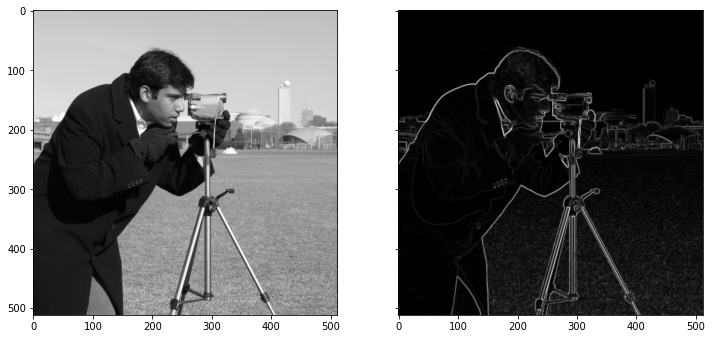

In [1]:
import matplotlib.pyplot as plt
import skimage

image = skimage.data.camera()
edge_sobel = skimage.filters.sobel(image)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 6))
axes[0].imshow(image , cmap=plt.cm.gray)
axes[1].imshow(edge_sobel, cmap=plt.cm.gray);

# Many Detectors Available


<center><img src="figs/03_edge_detectors.png" width=900px alt="default"/></center>

= Basic building blocks for many applications. We will see some of them.

# Three Approaches to Edge Detection

Three approaches to edge detection:
- First Derivative:
  - Find local extrema of a first derivative operator (Sobel, Canny)
- Second Derivative:
  - Find "zero crossings" of a second derivative operator (Marr / Hildreth)
- Patterns:
  - Fit edge patterns such as lines or circles (Hough transform)

# Three Approaches to Edge Detection

Three approaches to edge detection:
- **First Derivative:**
  - **Find local extrema of a first derivative operator (Sobel, Canny)**
- Second Derivative:
  - Find "zero crossings" of a second derivative operator (Marr / Hildreth)
- Patterns:
  - Fit edge patterns such as lines or circles (Hough transform)

# Edge Detection: Intuition

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.

<center><img src="figs/03_edge_intuition.png" width=1100px alt="default"/></center>

# Edge Detections: Using Gradients

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.

The gradient $\nabla I (x, y) = (I_x, I_y)(x, y) = \left(\frac{\partial I}{\partial x},\frac{\partial I}{\partial y} \right)(x, y), $ of image $I$ is computed via central differences:
- $\frac{\partial I}{\partial x}(x, y) = \lim_{dx \rightarrow 0} \frac{I(x + dx, y) - I(x, y)}{dx} \simeq \frac{I(x+1, y) - I(x-1,y)}{2}$
- $\frac{\partial I}{\partial y}(x, y) = \lim_{dy \rightarrow 0} \frac{I(x, y+dy) - I(x, y)}{dy} \simeq \frac{I(x, y+1) - I(x, y-1)}{2}$

<center><img src="figs/03_gradient_f.png" width=1100px alt="default"/></center>
<center> Gradient of an image $f$</center>

# Edge Detections: Using Gradients

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.

Gradient direction:
- is the direction of most increased intensity
- is equal to $\text{tan}^{-1}(\frac{I_y}{I_x})$
- is perpendicular to the direction of the edge



<center><img src="figs/03_gradient_f.png" width=1100px alt="default"/></center>
<center> Gradient of an image $f$</center>

# Edge Detections: Using Gradients

$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image.


Gradient magnitude:
- is the magnitude of intensity change
- is equal to $||\nabla I|| = \sqrt{I_x^2 + I_y^2}$
- defines the strength of the edge.


<center><img src="figs/03_gradient_f.png" width=1100px alt="default"/></center>
<center> Gradient of an image $f$</center>

<center><img src="figs/03_intensity.png" width=1100px alt="default"/></center>

# Edge Detections: Gradients

$\color{#047C91}{\text{Good Detection and Robustness to Noise?}}$ 
- Computing gradients as a way to detect edges is not robust to noise.
- Because noise creates pixels that look very different from their neighbors:
  - Gradient does not find the edge in the presence of noise!

<center><img src="figs/03_gradient_and_noise.png" width=500px alt="default"/></center>



# Edge Detections: Gradients & Smoothing

$\color{#047C91}{\text{Good Detection and Robustness to Noise?}}$ 
- Computing gradients as a way to detect edges is not robust to noise,
- Because noise creates pixels that look very different from their neighbors.
- We can first smooth the image to make these pixels look more similar!

<center><img src="figs/03_gradient_and_noise_smooth.png" width=550px alt="default"/></center>


# Edge Detections: Gradients & Smoothing

Edges in image $I$ should be found:
- **not** by looking in peaks of $\nabla I$,
- **but instead** by looking in peaks of $\nabla (I \ast g)$, where $g$ is a smoothing kernel.

$\color{#EF5645}{\text{Remark}}$: It seems that we need two operations:
- Smoothing $I$ with $g$ via convolution $I \ast g$,
- Taking the gradient $\nabla (I \ast g)$.

$\rightarrow$ a useful theorem can help us do this in one operation.

# Edge Detections: Gradients & Smoothing

$\color{#EF5645}{\text{Derivative Theorem of Convolution}}$: Given two function $f, g$ and $\ast$ the convolution, we have: $\frac{\partial}{\partial x}(f \ast g) = f \ast \frac{\partial g}{\partial x}.$



<center><img src="figs/03_derivative_conv.png" width=800px alt="default"/></center>

$\rightarrow$ this saves us one operation.

# Gradients and Smoothing

$\color{#047C91}{\text{Good Localization and Single Response?}}$
- Smoothing removes noise and helps find the edge.
- But it can also blur the edge: 
  - there are trade-offs
  - finding the right level of smoothing can be tricky.

<center><img src="figs/03_edge_smoothing.png" width=800px alt="default"/></center>

# Sobel Detector

$\color{#EF5645}{\text{Sobel Operator}}$ is an edge extractor which is a combination of:
- first derivative: with a horizontal central difference,
- smoothing: with a vertical tent filter.

<center><img src="figs/03_sobel.png" width=800px alt="default"/></center>

# Sobel Detector

$\color{#EF5645}{\text{Sobel Operator}}$ is an edge extractor which is a combination of:
- first derivative: with a horizontal central difference,
- smoothing: with a vertical tent filter.

The "full Sobel" Operator two such extractors: 
- one for horizontal changes,
- one for vertical changes.

<center><img src="figs/03_sobel_xy.png" width=800px alt="default"/></center>

# Sobel Detector: Magnitude and Direction

Denoting $G_x$ (resp. $G_y$) the result of applying $G_x$ (resp. $G_y$) to $I$, we define:
- the magnitude of the gradient/edge as $G = \sqrt{G_x ^2 + G_y ^ 2}$
- the direction of the gradient as $\theta = \text{tan}^{-1}(\frac{G_y}{G_x})$.

$\color{#EF5645}{\text{The Sobel Operator}}$ finds edges by thresholding $G$.

# In Practice: Sobel Detector

In [2]:
import scipy.signal as signal
import skimage
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
def my_sobel(im):
    img = im.astype(np.float)

    kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
    kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    gx = signal.convolve2d(img, kh)#, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(img, kv)#, mode='same', boundary = 'symm', fillvalue=0)
 
    g = np.sqrt(gx * gx + gy * gy)
    magnitude = g * 255.0 / np.max(g)
    direction = np.arctan(gy/gx)
   
    return magnitude, direction

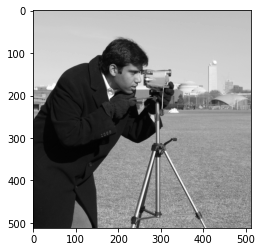

In [42]:
threshold = 50

image = skimage.data.camera()
plt.imshow(image, cmap=plt.cm.gray)

magnitude, direction = my_sobel(image)
detected_edges_points = np.where(magnitude > threshold)
direction_points = [
    direction[i, j] 
    for i, j in zip(
        detected_edges_points[0], detected_edges_points[1])]

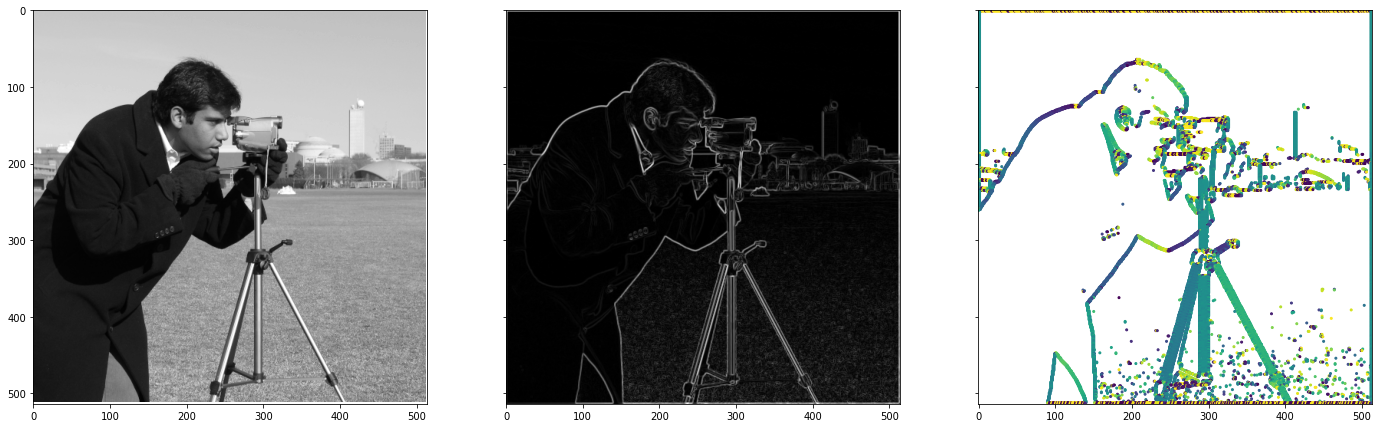

In [43]:
fig, axes = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(24, 8))
axes[0].imshow(image , cmap=plt.cm.gray)
axes[1].imshow(magnitude, cmap=plt.cm.gray);
axes[2].scatter(
    detected_edges_points[1], detected_edges_points[0], 
    cmap="viridis", c=direction_points,  s=4)
axes[2].set_aspect('equal', 'box')

# Sobel Detector: Limitations

$\color{#047C91}{\text{Good Detection?}}$
- May miss obliques edges more than horizontal and vertical edges: false negatives


$\color{#047C91}{\text{Good Localization?}}$
- May have poor localization 

$\color{#047C91}{\text{Single Response?}}$
- May trigger response in multiple adjacent pixels

$\rightarrow$ Move to the Canny Detector, one of the most used detectors.

# Canny Detector


$\color{#EF5645}{\text{Canny Detector}}$ is an edge extractor which detects edges via the following steps:
- Gradients and Smoothing: Convolve with derivatives of Gaussian filter
- Gradient magnitude and direction: Similar to the Sobel detector
- Enforce $\color{#047C91}{\text{Single Response}}$ with non-maxima suppression 
  - Thin multi-pixel wide "ridges" down to single pixel width
- Enforce $\color{#047C91}{\text{Good Detection}}$ with Hysteresis
  - Accept "weak" edges if connected to "strong" edges

# Canny Detector: Non-Maxima Suppression

- Enforce $\color{#047C91}{\text{Single Response}}$ with non-maxima suppression 
  - Thin multi-pixel wide "ridges" down to single pixel width
    - Select the image maximum point across the width of the edge


<center><img src="figs/03_nonmax_spp.png" width=800px alt="default"/></center>

# Canny Detector: Non-Maxima Suppression

- Enforce $\color{#047C91}{\text{Single Response}}$ with non-maxima suppression 
  - Thin multi-pixel wide "ridges" down to single pixel width
    - Select the image maximum point across the width of the edge
    - Value at q must be larger than interpolated values at p and r


<center><img src="figs/03_nonmax_spp2.png" width=650px alt="default"/></center>

In [44]:
# From: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180   
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255       
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

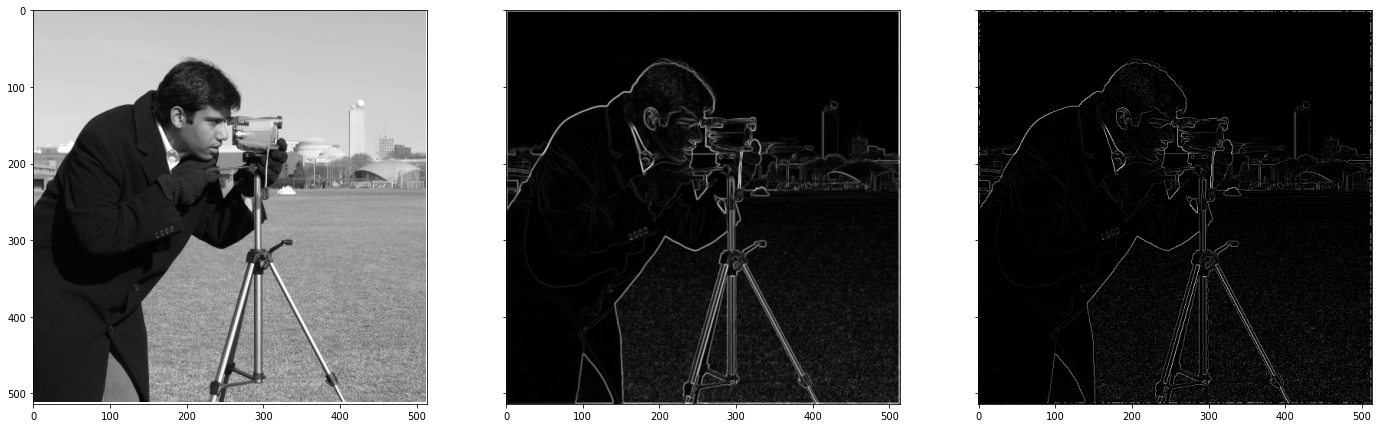

In [45]:
image = skimage.data.camera()
magnitude, direction = my_sobel(image)
magnitude_thin = non_max_suppression(magnitude, direction)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(24, 8))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(magnitude, cmap=plt.cm.gray)
axes[2].imshow(magnitude_thin, cmap=plt.cm.gray);

# Canny Detector: Linking and thresholding


- Enforce $\color{#047C91}{\text{Good Detection}}$ with Hysteresis
  - Accept "weak" edges if connected to "strong" edges
      - Define low, high strength thresholds $k_{low}, k_{high}$, typically: $\frac{k_{high}}{k_{low}} = 2$.
      - Use $k_{high}$ to find strong edges to start edge chain
      - Get continuation point (r or s) through edge's direction.
      - Accept continuation point if $>k_{low}$.



<center><img src="figs/03_linking.png" width=300px alt="default"/></center>

# Canny Detector: Linking and thresholding


- Enforce $\color{#047C91}{\text{Good Detection}}$ with Hysteris
  - Accept "weak" edges if connected to "strong" edges
      - Define low, high strength thresholds $k_{low}, k_{high}$, typically: $\frac{k_{high}}{k_{low}} = 2$.
      - Use $k_{high}$ to find strong edges to start edge chain
      - Get continuation point (r or s) through edge's direction.
      - Accept continuation point if $>k_{low}$.

$\rightarrow$ $\color{#EF5645}{\text{Hysteresis:}}$ A lag or momentum factor.


<center><img src="figs/03_hysteresis.png" width=650px alt="default"/></center>

In [49]:
# From: https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html
def threshold(img, 
              lowThresholdRatio=0.05, 
              highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [51]:
# From: https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

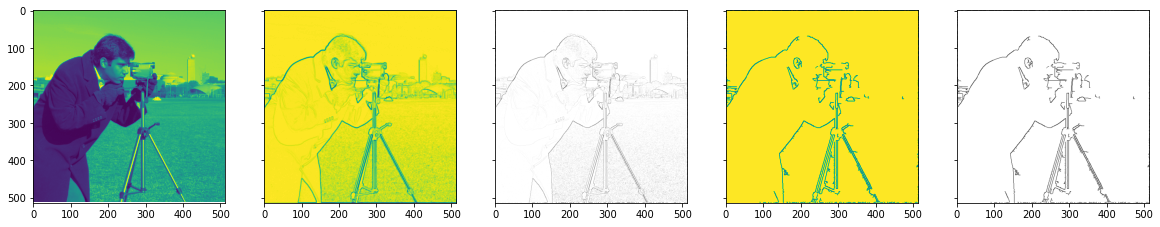

In [55]:
magnitude_weak_strong, weak, strong = threshold(
    magnitude_thin, lowThresholdRatio=0.1, highThresholdRatio=0.45)
result = hysteresis(magnitude_weak_strong, weak, strong)

fig, axes = plt.subplots(ncols=5, sharex=True, sharey=True, figsize=(20, 8))
axes[0].imshow(image)#, cmap=plt.cm.gray)
axes[1].imshow(-magnitude)#, cmap=plt.cm.gray)
axes[2].imshow(-magnitude_thin, cmap=plt.cm.gray)
axes[3].imshow(-magnitude_weak_strong, cmap="viridis") #plt.cm.gray);
axes[4].imshow(-result, cmap=plt.cm.gray);

# Effect of Gaussian Kernel size $\sigma$

Canny's detector requires choosing Gaussian kernel size $\sigma$:
- large $\sigma$: large scale edges
- small $\sigma$: fine features

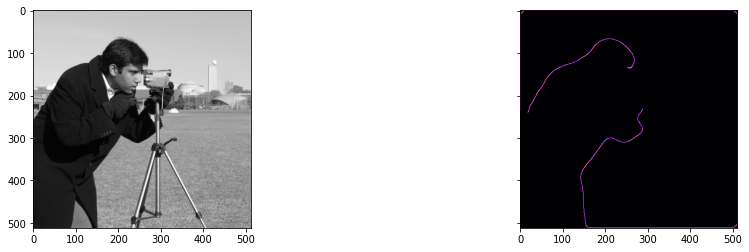

In [64]:
image = skimage.data.camera()
skimage_canny = skimage.feature.canny(image, sigma=10)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(skimage_canny, cmap="magma");

# From First to Second Derivatives

Three approaches to edge point detection:
- (significant) local extrema of a first derivative operator (Sobel, Canny)
- **"zero crossings" of a second derivative operator (Marr / Hildreth)**
- Fit patterns (Hough-transform)


<center><img src="figs/03_second.png" width=300px alt="default"/></center>

# Marr / Hildreth Edge Detector


$\color{#EF5645}{\text{Marr / Hildreth Algorithm}}$ is an edge extractor which detects edges via smoothing and second derivative:
- Smoothing: Gaussian filter
- Second Derivative: Laplacian $\nabla^2 I(x, y) = \frac{\partial^2 I (x, y)}{\partial x^2} + \frac{\partial^2 I (x, y)}{\partial y^2}$
- $\rightarrow$ Locate zero-crossings in the Laplacian of the Gaussian (LoG):
$$\nabla^2 G(x, y) = - \frac{1}{2\pi\sigma^4}\left(2 - \frac{x^2+y^2}{\sigma^2} \right)\exp \left(-\frac{x^2+y^2}{2\sigma^2}\right).$$


# Marr / Hildreth Edge Detector


$\color{#EF5645}{\text{Marr / Hildreth Algorithm}}$ is an edge extractor which detects edges via smoothing and second derivative.

<center><img src="figs/03_edge_mh.png" width=900px alt="default"/></center>

# Marr / Hildreth Edge Detector


$\color{#EF5645}{\text{Marr / Hildreth Algorithm}}$ is an edge extractor which detects edges via smoothing and second derivative.


<center><img src="figs/03_log.png" width=700px alt="default"/></center>

In practice:
- replace the Laplacian of Gaussian convolution with a difference of Gaussian (DoG) computation (convenient if a "Laplacian pyramid" has been computed).

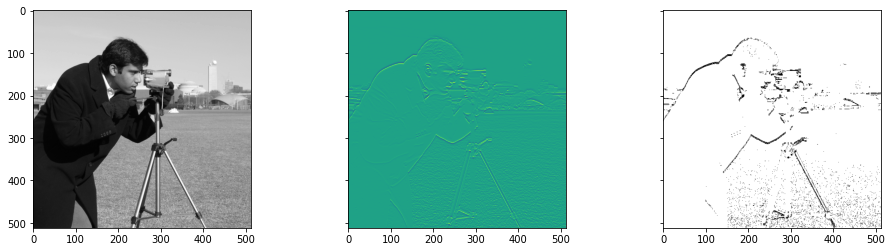

In [69]:
import skimage.filters

image = skimage.data.camera()
filtered_image = skimage.filters.difference_of_gaussians(
    image, low_sigma=0.1, high_sigma=2, channel_axis=-1)
edges = np.abs(filtered_image) < 0.1

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(-filtered_image, cmap="viridis")
axes[2].imshow(edges, cmap=plt.cm.gray);

# Towards Detecting Edges as Patterns

Three approaches to edge point detection:
- (significant) local extrema of a first derivative operator (Sobel, Canny)
- "zero crossings" of a second derivative operator (Marr / Hildreth)
- **Fit patterns (Hough-transform)**


# Hough Transform


$\color{#EF5645}{\text{The Hough transform}}$ is a transform that can be used to detect lines/circles, and thus edges, via the following steps:
- Perform edge detection: extract partial contours,
- Complete edges into contours by fitting lines through the edge's points.




# Hough Transform: Find Straight Lines

- Complete the edge's into contours by fitting lines through the points. 
  - Consider a point $(x_i, y_i)$ on the partial edge.
  - Line passing through: $y_i = a x_i + b$, rewritten as: $b = - a x_i +y_i$
    - One point give a line of slope $x_i$ and intercept $y_i$ in $(a, b)$ space.
  - Find $(a, b)$ where several lines meet in $(a, b)$ space: number of votes.
  
  
 <center><img src="figs/03_hough.png" width=750px alt="default"/></center>



 <center><img src="figs/03_hough2.png" width=800px alt="default"/></center>



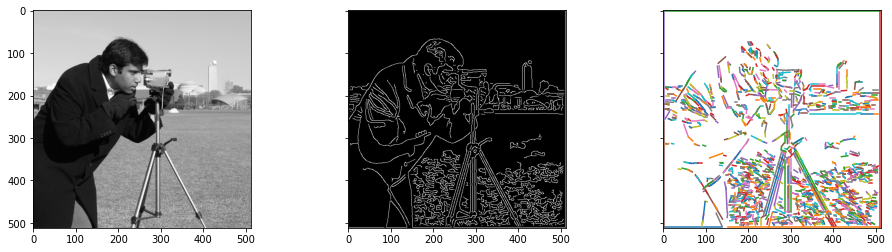

In [70]:
from skimage.transform import probabilistic_hough_line

image = skimage.data.camera()
edges = skimage.feature.canny(image, 2, 1, 25)
lines = probabilistic_hough_line(
    edges, threshold=10, line_length=5, line_gap=3)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[1].imshow(edges, cmap=plt.cm.gray)
for line in lines:
    p0, p1 = line
    axes[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
    axes[2].set_aspect('equal', 'box')

# Hough Transform: Limitations

Pros:
- Conceptually simple and easy implementation
- $\color{#047C91}{\text{Good Detection and Robustness to Noise}}$: handles missing data
- Can be adapted to other types of form beyond lines.

Cons:
- Looks for only a single type of edge at a time
- Can only detect edges if their parametric equation is known.
- Colinear line cannot be separated: No $\color{#047C91}{\text{Single Response}}$.



# Feature Detection, Matching, Segmentation

- [Point and Patches](#sec-syllabus)

- [Edges and Contours](#sec-ece)

- **[Contour Tracking](#sec-ece)**

- [Segmentation](#sec-ece)

# Fill out the Anonymous Feedback Form

https://forms.gle/PUNmF6yd4BQQLuqE9

# Limits of Edge Detection

Edge detection has some limits:
- boundaries of interest are fragmented,
- we have extra “clutter” edge points,

$\rightarrow$ consider detecting "contours" instead.

<center><img src="figs/03_edge_detection_contour2.png" width=450px alt="default"/></center>

# Recall: Edges and Contours
$\color{#EF5645}{\text{Edges}}$ are significant local changes of intensity in a digital image. Edges are a set of connected pixels that forms a boundary between two disjoint regions. Edges may or may not form a closed shape. 

$\color{#EF5645}{\text{Contours}}$ are a set of connected pixels with the same intensity that forms a **closed shape** defining the boundary of an object.


<center><img src="figs/03_human_edges.png" width=700px alt="default"/></center>

# Contours and Segmentation


$\color{#EF5645}{\text{Contours}}$ are a set of connected pixels with the same intensity that forms a **closed shape** defining the boundary of an object.

$\color{#EF5645}{\text{Image segmentation}}$ is the process of dividing an image into different regions based on the characteristics of pixels to identify objects or boundaries to simplify an image and more efficiently analyze it.

<center><img src="figs/03_human_edges.png" width=700px alt="default"/></center>

# Contours Detection

$\color{#EF5645}{\text{Active Contours Methods}}$ are contour detection methods that iteratively move towards their final solution under guidance forces.


<center><img src="figs/03_summary_contour.png" width=600px alt="default"/></center>



# Applications: Contours \& Segmentation

Active contours can be seen as the segmentation and identification of 1 region.

$\color{#047C91}{\text{Example}}$: Brain tumor segmentation:
- helps predicting tumor growth,
- is crucial for radiotherapy planning (cancer treatment that uses high doses of radiation to kill cancer cells and shrink tumors).

<center><img src="figs/03_snake_brain.png" width=450px alt="default"/></center>

# Applications: Contours \& Segmentation

Active contours can be seen as the segmentation and identification of 1 region.

$\color{#047C91}{\text{Example}}$: Lips segmentation:
- helps algorithms translating lips movements into text.

<center><img src="figs/03_lips.png" width=700px alt="default"/></center>

# Actives Contours


Many active contour methods available:
- snakes (Kass, Witkin, and Terzopoulos 1988),
- intelligent scissors (Mortensen and Barrett 1995),
- level set techniques (Osher and Sethian 1988). 

We will see some of them.

<center><img src="figs/03_summary_contour.png" width=500px alt="default"/></center>


# Actives Contours


Many active contour methods available:
- **snakes (Kass, Witkin, and Terzopoulos 1988)**,
- intelligent scissors (Mortensen and Barrett 1995),
- level set techniques (Osher and Sethian 1988). 

We will see some of them.

<center><img src="figs/03_summary_contour.png" width=500px alt="default"/></center>


# Snakes: Building from Splines

$\color{#EF5645}{\text{A spline}}$ is a piecewise polynomial function in a variable $s$.




<center><img src="figs/03_cubic_spline.png" width=500px alt="default"/></center>

<center>Example: Cubic spline</center>

# Snakes: Building from Splines


$\color{#EF5645}{\text{Snakes}}$ are an active contour model method:
- that fits open or closed splines to lines or edges in an image,
- where the contour is called "snake", because the splines often "wiggle".

<center><img src="figs/03_summary_contour.png" width=600px alt="default"/></center>

# Snakes: Building from Splines


$\color{#EF5645}{\text{Snakes}}$ are splines defined as:
- **Continuous view**: parametrically as $v(s)=[x(s), y(s)]$,
  - where parameter $s \in [0, 1]$ is normalized arc length along the contour,
- **Discretized view**: in practice, as $\{v_i\}_{i=0}^{I}$, 
  - where the $v_i$'s are the snake points, also called, "snaxels", 
  - usual distance between adjacent "snaxels" of approximately 3 pixels.

<center><img src="figs/03_summary_contour.png" width=400px alt="default"/></center>


# Snakes: Fitting Method

$\color{#6D7D33}{\text{Snake: Method overview}}$
- **Initialization:** Initial snake is placed on the image.
- **Iterations:** Snake moves to decrease its "energy" (depends on task),
- **Termination:** Snake stops moving upon reaching a local energy minimum.

<center><img src="figs/03_summary_contour.png" width=400px alt="default"/></center>

$\color{#EF5645}{\text{Remark:}}$ Snake is active when minimizing its energy functional: dynamic behavior.



# Snakes: Fitting Method

$\color{#6D7D33}{\text{Snake: Method overview}}$
- **Initialization:** Initial snake is placed on the image.
  - Good initialization is critical!
     - Especially around small neighboring objects
     - Especially if the image is really noisy/blurry
  - If possible:
     - Best to initialize on "cleaner" side of object's boundary
  - Otherwise: 
     - Best to initialize outside the object, because snakes tend to shrink.

$\color{#6D7D33}{\text{Snake: Method overview}}$
- **Iterations:** Snake moves to decrease its "energy" (depends on task).

$\color{#EF5645}{\text{The snake energy functional}}$ to be minimized is a combination of internal and external constraints that may be written as:

$$\begin{align*}
E^*_{snake} 
&= \int_0^1 E_{snake}(v(s))ds\\
&= \alpha \int_0^1E_{cont}(v(s))ds + \beta \int_0^1 E_{curv}(v(s))ds + \gamma \int_0^1 E_{image}(v(s))ds,
\end{align*}$$

where:
- $E_{cont}, E_{curv}$: snake continuity and curvature, and form the $\color{#EF5645}{\text{internal energy}}$,
- $E_{image}$: are the image forces, which form the $\color{#EF5645}{\text{external energy}}$,
- $\alpha, \beta, \gamma$ are scalars that determine tradeoffs (weighting differently the terms).

# Internal Energy

$\color{#EF5645}{\text{The internal energy}}$ sometimes called shape energy is designed to reduce extreme curvature and prevent outlier points. It is formed of:
- the snake continuity $E_{cont}(v(s))$, also called elastic energy, or elasticity,
- the snake curvature $E_{curv}(v(s))$, also called bending energy, or stiffness.



<center><img src="figs/03_snake_int.jpg" width=780px alt="default"/></center>

# Internal Energy: Continuity

$\color{#EF5645}{\text{The snake continuity}}$ is defined as:
$$ \int_0^1E_{cont}(v(s))ds =  \int_0^1\left|\frac{dv}{ds}\right|^2ds,$$
and discretized along the snake's curve as: $E_{cont}(v) = \sum_{i=0}^{I-1} \alpha |v_{i+1} - v_{i}|^2.$


<center><img src="figs/03_snake_int.jpg" width=800px alt="default"/></center>

# Internal Energy: Curvature


$\color{#EF5645}{\text{The snake curvature}}$ is defined as:
$$ \int_0^1E_{curv}(v(s))ds =  \int_0^1\left|\frac{d^2v}{ds^2}\right|^2ds,$$
and discretized along the snake's curve as: $E_{curv}(v) = \sum_{i=1}^I \alpha |v_{i+1} -2 v_i + v_{i-1}|^2.$

<center><img src="figs/03_snake_int.jpg" width=800px alt="default"/></center>

# External Energy

$\color{#EF5645}{\text{The external energy}}$, sometimes called image energy, is designed to capture desired image or contour features. It describes how well the curve matches the image data locally. 

Depending on the image features we wish to attract the snake to, it can have different terms, such as:
- $\color{#EF5645}{\text{Line functional:}}$ Attraction to dark or bright lines,
- $\color{#EF5645}{\text{Edge functional:}}$ Attraction to edges,

and is one of the most common points of modification in derivative methods.

# External Energy: Line Functional


$\color{#EF5645}{\text{Line functional:}}$ The line functional attracts the snake to dark or bright lines, and writes simply as the image intensity, as:
$$E_{image}(v(s)) = I(v(s))$$
which is discretized as:
$$E_{image}(v) = \sum_{i=1}^I I(v_i).$$

Sign of the coefficient $\gamma$ determines if the line is attracted to dark lines or light lines.



# External Energy: Edge Functional


$\color{#EF5645}{\text{Edge functional:}}$ The edge functional attracts the snake to edges and writes as:
$$E_{image}(v(s)) = - \int_0^1 |\nabla I(v(s))|ds,$$
which is discretized as:
$$E_{image}(v) = - \sum_{i=1}^I \nabla I(v_i).$$



# External Energy: Edge Functional


$\color{#EF5645}{\text{Remark:}}$ A snake originating far from the desired object contour may erroneously converge to some local minimum. 
- Use a blurring filter on the image to avoid this.
- Reduce amount of blur as the calculation progresses to refine the fit of the snake.

$\color{#6D7D33}{\text{Snake: Method overview}}$
- **Iterations:** Snake moves to decrease its "energy" (depends on task).

Minimize:
$$E^*_{snake} = \alpha \int_0^1E_{cont}(v(s))ds + \beta \int_0^1 E_{curv}(v(s))ds + \gamma \int_0^1 E_{image}(v(s))ds,
\\$$
by gradient descent:
$$v_i \leftarrow v_i - 0.1 \frac{\partial}{\partial v_i} \sum_i \left(
    \alpha |v_i - v_{i-1}|^2 + \beta |v_{i+1} -2 v_i + v_{i-1}|^2 + \gamma (I(v_i) + \nabla I(v_i))\right) $$

- **Termination:** Snake stops moving upon reaching a local energy minimum.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Snake: Example with Closed Curve

- **Initialization:** An initial spline (snake) is placed on the image.

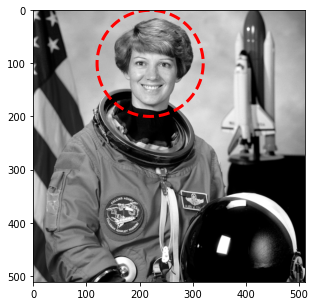

In [25]:
img = rgb2gray(data.astronaut())
smooth_img = gaussian(img, 2)

s = np.linspace(0, 2*np.pi, 400)
v_init = np.array([100 + 100*np.sin(s), 220 + 100*np.cos(s)]).T

fig, ax = plt.subplots(figsize=(5, 5)); ax.imshow(img, cmap=plt.cm.gray); ax.plot(v_init[:, 1], v_init[:, 0], '--r', lw=3);

- **Iterations:** Snake moves to decrease its "energy".

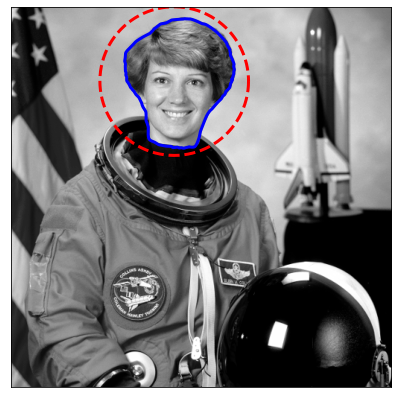

In [35]:
snake = active_contour(
    smooth_img, v_init, alpha=0.015, beta=20, gamma=0.001)#, max_num_iter=100)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(v_init[:, 1], v_init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([]), ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

# Snake: Example with Open Curve

- **Initialization:** Initial snake is placed on the image.

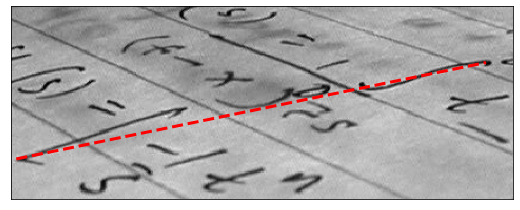

In [36]:
img = data.text()
smooth_img = gaussian(img, 1)

r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r, c]).T

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray); ax.plot(init[:, 1], init[:, 0], '--r', lw=3); ax.set_xticks([]), ax.set_yticks([]); ax.axis([0, img.shape[1], img.shape[0], 0]); plt.show()

- **Iterations:** Snake moves to decrease its "energy" (task dependent)

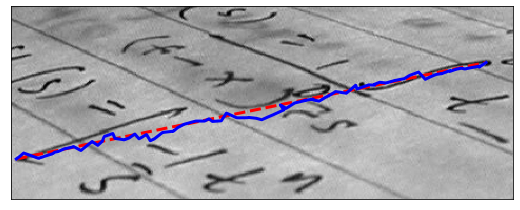

In [41]:
snake = active_contour(
    smooth_img,
    init, boundary_condition='fixed',
    alpha=0., beta=0.0, w_line=5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

# Snakes: Limitations (1)

Limits of snakes:
- **Initialization**: 
    - Critical, yet not straightforward.
        - $\rightarrow$ Try different initializations: manual, learned, exhaustive.

# Snakes: Limitations (2)

Limits of snakes:

- **Iterations and Termination**: 
    - Difficult to predict stability and convergence of the snake deformation:
        - $\rightarrow$ Add some constraints:
            - Pull nearby points toward cursor: $E_{pull} = - \sum_{i=0}^{n-1} \frac{r^2}{|v_i - p|^2}$
            - Push nearby points away from cursor: $E_{push} = + \sum_{i=0}^{n-1} \frac{r^2}{|v_i - p|^2}$



<center><img src="figs/03_snake_constraints.png" width=300px alt="default"/></center>

# Snakes: Limitations (3)


Limits of snakes:
- **Iterations and Termination**: 
    - Tendency to shrink:
        - $\rightarrow$ Initialize outside the boundary.
        - $\rightarrow$ Use an expansion ballooning force, moving each point outwards along its normal.
    - Not trivial to prevent curve self intersecting


<center><img src="figs/03_snake_self_intersect.png" width=800px alt="default"/></center>

# Snakes: Limitations (4)


- **Iterations and Termination**: 
    - May over-smooth the boundary

    - May not follow topological changes of objects: cannot split or merge.


<center><img src="figs/03_snakes_topo.png" width=500px alt="default"/></center>


# Actives Contours


Many active contour methods available:
- snakes (Kass, Witkin, and Terzopoulos 1988),
- intelligent scissors (Mortensen and Barrett 1995),
- **level set techniques (Osher and Sethian 1988).**

<center><img src="figs/03_summary_contour.png" width=500px alt="default"/></center>

# Level Sets: Explicit \& Implicit Contours

$\color{#EF5645}{\text{Level sets}}$ are active contour methods that represent contours:
- as level sets of an embedding function $\phi$, e.g. zero-crossings (implicit contour),
- as opposed to a parameterized curve $v(s)$ (explicit contour).

During iterations, 
- the embedding function $\phi$ evolves, and makes its zero-crossings evolve,
- the evolving contour is sometimes called the evolving front.

<center><img src="figs/03_implicit_contour.png" width=300px alt="default"/></center>




# Level Sets: Notations


$\color{#EF5645}{\text{Notations}}$:
- $t$ indexes iterations when the contour is evolving
- Contour defined by zero-crossing of an evolving $\phi$: $\phi(x, y, t) = 0$.
- $x = (x, y)$ is an image point such that $\phi(x(t), t) = 0$ if $x(t)$ is on evolving front.

<center><img src="figs/03_implicit_contour.png" width=300px alt="default"/></center>


# Level Sets: Pros and Cons

- Cons:
  - Need to evolve a 2D object (a surface) as opposed to a 1D object (a curve)
  - $\rightarrow$ More computationally expensive.
  
- Pros: 
  - Can handle topology changes, like merging and splitting.
  - $\rightarrow$ Address a huge limitation of snakes.
  
 

# Level Sets: Pros and Cons

    
<center><img src="figs/03_levels_merging.png" width=580px alt="default"/></center>


# Level Sets: Embedding function $\phi$

$\color{#6D7D33}{\text{Choosing the embedding function}}$ $\phi$:
- Choose an initial $\phi(t=0)$: 
- Evolve it according to some evolution equation, if we can write $\phi_t =\frac{\partial \phi}{\partial t}$.

# Level Sets: Embedding function $\phi$

$\color{#6D7D33}{\text{Choosing the embedding function}}$ $\phi$:
- Choose an initial $\phi(t=0)$: 
  - $\rightarrow \phi$ is anything as long as its zero-crossing gives desired initial contour.
  - $\color{#047C91}{\text{Example}}$: Consider the square contour below.
     - Take the surface height $z = \phi(x, y)$ is equal to the distance $d$ from $(x, y)$ to the closest point on the contour, with distance d positive outside the contour, and d negative inside it.
   
    
<center><img src="figs/03_implicit_contour.png" width=300px alt="default"/></center>


# Level Sets: Embedding function $\phi$

$\color{#6D7D33}{\text{Choosing the embedding function}}$ $\phi$:
- Choose an initial $\phi(t=0)$: 
- Evolve it according to some evolution equation, if we can write $\phi_t = \frac{\partial \phi}{\partial t}$.

The evolving front is characterized by $\phi(x(t), t) = 0$ for any time $t$. Thus, differentiating with respect to $t$ gives:

$$\begin{align*}
\frac{\partial}{\partial t} \phi(x(t), t) &= 0 \\
\frac{\partial \phi}{\partial x} \frac{\partial x}{\partial t} + \frac{\partial \phi}{\partial t} \frac{\partial t}{\partial t}&= 0\\
\nabla \phi \cdot x_t + \phi_t &= 0
\end{align*}$$

We get evolving equation for $\phi$ as long as we specify evolving equation for $x$, i.e. $x_t$.

# Level Sets: Force Function $F$


$\color{#EF5645}{\text{Force Function}}$: We model the evolution of $x$ by defining a force function $F$, so that:
$$x_t = F(x(t)) n,$$
where $n = \frac{\nabla \phi}{|\nabla \phi|}$ is normal to the surface.

This allows to write:
$$\begin{align*}
\nabla \phi \cdot x_t + \phi_t &= 0 \\
\nabla \phi \cdot F(x(t)) n + \phi_t &= 0 \\
\nabla \phi \cdot F(x(t)) \frac{\nabla \phi}{|\nabla \phi|} + \phi_t &= 0 \\
\phi_t + F(x(t)) |\nabla \phi| &= 0 \\
\end{align*}$$


# Level Sets: Embedding function $\phi$

$\color{#6D7D33}{\text{Choosing the embedding function}}$ $\phi$:
- Choose an initial $\phi(t=0)$.
- Evolve it according to some evolution equation, if we can write $\frac{\partial \phi}{\partial t}$.

$\color{#EF5645}{\text{The evolution equation for the embedding function}}$ is:
$$\phi_t + F(x(t)) |\nabla \phi| = 0$$


# Controlling curvature

$\color{#EF5645}{\text{The surface curvature}}$ is defined as:
$$ \kappa = \nabla \frac{\nabla \phi}{|\nabla \phi|} = \frac{\phi_{xx}\phi_y^2 - 2 \phi_{xy}\phi_x\phi_y+\phi_{yy}\phi_x^2}{(\phi_x^2 + \phi_y^2)^{1/2}}.$$

The surface curvature can be used to control the smoothness of the evolving front.

# Toy Example: "Water Drop"

$\color{#EF5645}{\text{The evolution equation for the embedding function}}$ is:
$$\phi_t + F(x(t)) |\nabla \phi| = 0$$

$\color{#047C91}{\text{Example}}$: Consider a force function $F$ such that:
- $F = 1$ everywhere: the contour tends to expand everywhere.
- $F = 0$ on an obstacle: the contour cannot expand there.

<center><img src="figs/03_level_set_ex.png" width=800px alt="default"/></center>

# Toy Example: "Filling Shapes"

$\color{#EF5645}{\text{The evolution equation for the embedding function}}$ is:
$$\phi_t + F(x(t)) |\nabla \phi| = 0$$

$\color{#047C91}{\text{Example}}$: Consider a force function $F$ such that:
- $F = 1$ inside a given form
- $F = -1$ outside a give form

<center><img src="figs/03_level_set_ex2.png" width=550px alt="default"/></center>

# Toy Example: "Curvature Collapse"

$\color{#EF5645}{\text{The evolution equation for the embedding function}}$ is:
$$\phi_t + F(x(t)) |\nabla \phi| = 0$$

$\color{#047C91}{\text{Example}}$: Consider a force function $F$ such that:
- $F = \kappa$, it is equal to the curvature of the surface.

<center><img src="figs/03_level_set_ex3.png" width=800px alt="default"/></center>

# Example: Cardiac Segmentation

$\color{#EF5645}{\text{The evolution equation for the embedding function}}$ is:
$$\phi_t + F(x(t)) |\nabla \phi| = 0$$

Consider a force function $F$ that is derived from the image, e.g.:
- $F$ high inside an object: expand the contour from inside an object,
- $F$ low close to the edge: stop the contour at the edges.

$\rightarrow$ Use some decreasing function of the image gradient.

<center><img src="figs/03_cardiac_gradient.png" width=400px alt="default"/></center>


# Example: Cardiac Segmentation


$\color{#EF5645}{\text{The evolution equation for the embedding function}}$ is:
$$\phi_t + F(x(t)) |\nabla \phi| = 0$$

$\color{#047C91}{\text{Examples}}$ of force functions $F$ that get the contours to evolve to the edges:
- Inverse of the image gradient: $F(x) = \frac{1}{1 + \lambda |\nabla I(x)|}$,
- Gaussian of the image gradient: $F(x) = e^{- \frac{|\nabla I(x)|^2}{2\sigma^2}}$

where $\lambda, \sigma$ control how penalizing the edge should be.



# Example: Cardiac Segmentation


<center><img src="figs/03_level_set_ex4.png" width=900px alt="default"/></center>

# Feature Detection, Matching, Segmentation

- [Point and Patches](#sec-syllabus)

- [Edges and Contours](#sec-ece)

- [Contour Tracking](#sec-ece)

- **[Segmentation](#sec-ece)**

# Answers from Anonymous Form

https://docs.google.com/forms/d/1lmXJ1YOvLjwVUlWEL1rjS1D4FC4c7OzMo7hCo7FF_7E/edit#responses

Note: Grades on Web Apps will be given after the second round of apps.

# Contours and Segmentation


$\color{#EF5645}{\text{Contours}}$ are a set of connected pixels with the same intensity that forms a **closed shape** defining the boundary of an object: "segmentation of one region"

$\color{#EF5645}{\text{Image segmentation}}$ is the process of dividing an image into different regions based on the characteristics of pixels to identify objects or boundaries.


<center><img src="figs/03_human_edges.png" width=700px alt="default"/></center>

# Segmentation

$\color{#EF5645}{\text{Image segmentation}}$ is the process of dividing an image into different regions based on the characteristics of pixels to identify objects or boundaries.


<center><img src="figs/03_intro_seg1.png" width=800px alt="default"/></center>

The different regions are called $\color{#EF5645}{\text{segments}}$.

# Types of Segmentation

$\color{#EF5645}{\text{Semantic segmentation}}$ gives a label to each segment.

<center><img src="figs/03_intro_seg2.png" width=800px alt="default"/></center>

# Types of Segmentation

$\color{#EF5645}{\text{Foreground/Background segmentation}}$ divides the image into two segment: foreground and background.

<center><img src="figs/03_intro_seg3.png" width=700px alt="default"/></center>

# Related to Segmentation

<center><img src="figs/03_seg_types.png" width=900px alt="default"/></center>

# Importance of Segmentation

Segmentation allows us to simplify a downstream task, such as classification. For example, it can increase classification accuracy.

<center><img src="figs/03_intro_seg4.png" width=500px alt="default"/></center>

# Applications of Segmentation

- Content based image retrieval
- Medical imaging (tumor segmentation)
- Object detection (face detection)
- 3D reconstruction
- Object tracking, object recognition
- Object-based measurements such as size and shape
- Video surveillance
- etc.

$\rightarrow$ one of the oldest and most widely studied problems.

# Many Segmentation Algorithms

Segmentation methods can be divided into several classes:
- Thresholding
- Region-based methods (region growing, etc)
- Clustering (k-means, GMMs, mean-shift, etc)
- Graph-based methods (graph-cut, random walk, etc)
- Shape based methods (active contours)
- Energy minimization methods (MRF)
- Machine learning and deep learning methods.

$\rightarrow$ we will see some of these.

# Many Segmentation Algorithms

Segmentation methods can be divided into several classes:
- **Thresholding**
- Region-based methods (region growing, etc)
- Clustering (k-means, GMMs, mean-shift, etc)
- Graph-based methods (graph-cut, random walk, etc)
- Shape based methods (active contours)
- Energe minimization methods (MRF)
- Machine learning and deep learning methods.

$\rightarrow$ we will see some of these.

# Image Binarization with Thresholding

$\color{#EF5645}{\text{Image binarization}}$ applies often just one global threshold $T$ for mapping a scalar image $I$ into a binary image.
$$ J(x, y) = \begin{Bmatrix} 
0 \quad \text{if } I(x, y) < T \\
1 \quad \text{otherwise}
\end{Bmatrix}.$$

The most frequently employed method for determining the threshold is based on histograms.

<center><img src="figs/03_t_h.png" width=300px alt="default"/></center>

In [50]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

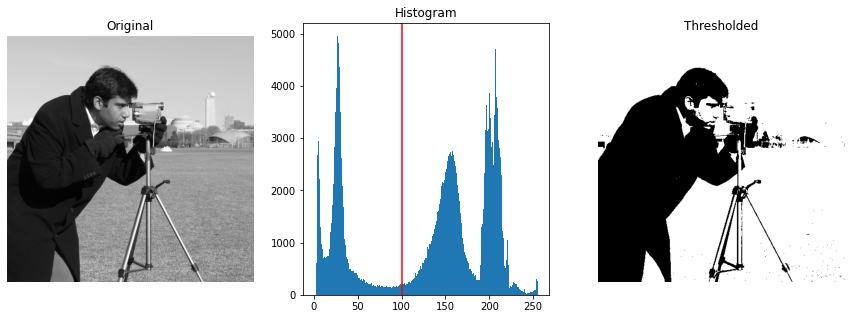

In [53]:
image = data.camera()
thresh = 100
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(15, 5)); ax = axes.ravel(); ax[0] = plt.subplot(1, 3, 1); ax[1] = plt.subplot(1, 3, 2); ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])
ax[0].imshow(image, cmap=plt.cm.gray); ax[0].set_title('Original'); ax[0].axis('off')
ax[1].hist(image.ravel(), bins=256); ax[1].set_title('Histogram'); ax[1].axvline(thresh, color='r')
ax[2].imshow(binary, cmap=plt.cm.gray); ax[2].set_title('Thresholded'); ax[2].axis('off')
plt.show()

# Otsu Thresholding

$\color{#EF5645}{\text{Otsu Thresholding}}$ uses the grey-value histogram to provide the "best" threshold $T$, where "best" means:
- "overlap" of the 2 classes (white/black) is minimized,
- i.e. between-class variance $\sigma^2_b$ is maximized:

$$ \sigma_b^2 = P_1 (\mu_1 - \mu)^2 + P_2 (\mu_2 - \mu)^2 = P_1 P_2 (\mu_1 - \mu_2)^2,$$
where $p(i)$ is the probability of pixel $i$ being white and:
- $P_i$ denote class probabilities, $P_1 = \sum_{i = 0}^T p(i)$, $P_2 = \sum_{i = T+1}^{G_{max }} p(i)$
- $\mu_i$ the means of white and black classes: $\mu_1 = \sum_{i = 0}^T ip(i)/P_1$, $\mu_2 = \sum_{i = T+1}^{G_{max}} i p(i) / P_2$

# Otsu Thresholding Algorithm

<center><img src="figs/03_otsu.png" width=800px alt="default"/></center>

# Otsu Thresholding Algorithm

<center><img src="figs/03_otsu_example.png" width=900px alt="default"/></center>

102


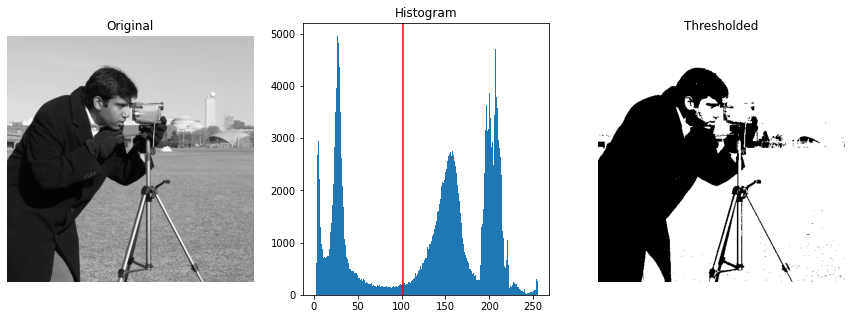

In [55]:
image = data.camera()
thresh = threshold_otsu(image)
print(thresh)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(15, 5)); ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1); ax[1] = plt.subplot(1, 3, 2); ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray); ax[0].set_title('Original'); ax[0].axis('off')
ax[1].hist(image.ravel(), bins=256); ax[1].set_title('Histogram'); ax[1].axvline(thresh, color='r')
ax[2].imshow(binary, cmap=plt.cm.gray); ax[2].set_title('Thresholded'); ax[2].axis('off')

plt.show()

# Thresholding: Pros and Cons

Pros:
- Very simple

Cons:
- Histogram "valley" too broad
- No visible valley
- Histgram might be multimodal
- There might be several minima due to the type of image
- Noise

# Many Segmentation Algorithms

Segmentation methods can be divided into several classes:
- Thresholding
- **Region-based methods (region growing, etc)**
- Clustering (k-means, GMMs, mean-shift, etc)
- Graph-based methods (graph-cut, random walk, etc)
- Shape based methods (active contours)
- Energe minimization methods (MRF)
- Machine learning and deep learning methods.

$\rightarrow$ we will see some of these.

# Regions in "Region Based"

$\color{#EF5645}{\text{Region}}$ is a group of connected pixels with similar properties, with a closed boundary, i.e. defined by spatial proximity and similarity.

<center><img src="figs/03_regions.png" width=400px alt="default"/></center>

Regions in "Region based" are not (yet) segments: growing, splitting and merging might occur.

# Region Growing

$\color{#6D7D33}{\text{Region growing: Method overview}}$
- Start with a seed pixel $(x, y, I(x, y))$
- Recursively add adjacent pixels:
  - if "similarity criterion" with grown region is satisfied.

$\color{#EF5645}{\text{Remark:}}$ Need to choose:
- Adjacency relation: see region adjacency graph after
- Similarity criterion:
    - Same intensity between candidate pixel \& region average.
    - Same standard deviations.

# Region Splitting and Merging 

$\color{#6D7D33}{\text{Region splitting: Method overview}}$
- Start with the whole image
- Recursively subdivide it into sub-regions:
  - while a homogeneity condition is not satisfied.

$\color{#6D7D33}{\text{Region merging: Method overview}}$
- Start with small regions (2x2 or 4x4)
- Recursively merge regions:
  - if a "similarity criterion" is satisfied.

$\rightarrow$ Opposite of region splitting, that avoids over-segmentation.

# Region Splitting and Merging

<center><img src="figs/03_split.png" width=900px alt="default"/></center>

# Region Splitting and Merging 

$\color{#EF5645}{\text{The region adjacency graph}}$ represents adjacency and can be obtained via splitting in quadtree.

<center><img src="figs/03_rag.png" width=600px alt="default"/></center>

In [56]:
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])

# Example: Region Merging

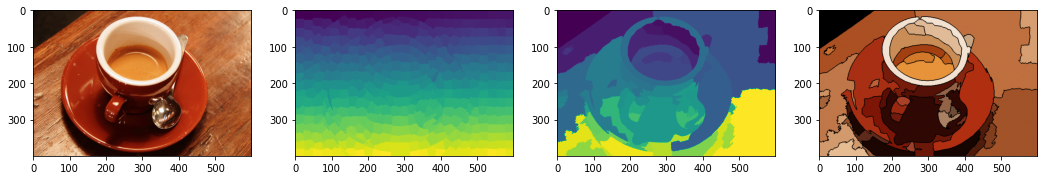

In [57]:
fig, axes = plt.subplots(ncols=4, figsize=(18, 6))

img = skimage.data.coffee()
labels = skimage.segmentation.slic(img, compactness=30, n_segments=400, start_label=1) #(255*rgb2gray(img)).astype(int) #
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = skimage.color.label2rgb(labels2, img, kind='avg', bg_label=0)
out = skimage.segmentation.mark_boundaries(out, labels2, (0, 0, 0))
axes[0].imshow(img)
axes[1].imshow(labels)
axes[2].imshow(labels2)
axes[3].imshow(out);

# Many Segmentation Algorithms

Segmentation methods can be divided into several classes:
- Thresholding
- Region-based methods (region growing, etc)
- **Clustering (k-means, GMMs, mean-shift, etc)**
- Graph-based methods (graph-cut, random walk, etc)
- Shape based methods (active contours)
- Energy minimization methods (MRF)
- Machine learning and deep learning methods.

$\rightarrow$ we will see some of these.

# Segmentation and Clustering


$\color{#EF5645}{\text{Image segmentation}}$ is the process of dividing an image into different regions based on the characteristics of pixels to identify objects or boundaries. The downstream goal is to simplify an image and more efficiently analyze it.


$\color{#EF5645}{\text{Clustering}}$ is a type of statistics or machine learning algorithm that aims to find groups (clusters) of data points with similar characteristics. Segmentation can be seen as a clustering of pixels.

$\color{#EF5645}{\text{Remark:}}$ Main differences:
- clustering ignores pixel layout and neighborhoods,
- segmentation relies heavily on spatial cues and constraints.

# Clustering

$\color{#EF5645}{\text{Clustering}}$ organizes data into clusters (groups) such that:
- high intra-class similarity
- low inter-class similarity

$\color{#EF5645}{\text{Remark:}}$ In Machine Learning, clustering is distinct from classification as it is fully unsupervised.


<center><img src="figs/03_clustering.png" width=800px alt="default"/></center>

# Clustering: Defining Similarity

Pixels within an image can considered as data points in a space of:
- color: pixels are points in 3D space
- color + location: in 5D space
- texture

The distance of the points in this space define their similarity.

<center><img src="figs/03_clus_color.png" width=600px alt="default"/></center>

Principal algorithms based on similarity:
- K-means
- Gaussian Mixture Models (GMMs) and Expectation-Maximization (EM)
- **Mean-shift**

# Mean-Shift Segmentation

$\color{#EF5645}{\text{Mean-shift}}$ locates maxima of a density functions given discrete data samples from this function.

$\color{#6D7D33}{\text{Mean-shift segmentation: Method overview}}$ Given a kernel function $K$:
- Start with initial pixel, with intensity $x$,
- Determine the weights of points $x_i \in N(x)$ in neighborhood $N(x)$,
- Estimate the weighted mean: 
$$m(x) = \frac{\sum_{x_i \in N(x)} K(x_i - x)x_i}{\sum_{x_i \in N(x)} K(x_i - x)}.$$
- Shift to the mean $m(x)$ and iterate.

<center><img src="figs/03_meanshift.png" width=800px alt="default"/></center>

<center><img src="figs/03_parrot.png" width=850px alt="default"/></center>

# Mean-Shift: In Practice

$\color{#EF5645}{\text{Remarks:}}$
- Good to initialize different initial pixels and run the algorithm several times.
- Possible Kernels $K$

<center><img src="figs/03_kernels.png" width=300px alt="default"/></center>

# Mean-Shift: Pros and Cons

Pros:
- Only need to adjust the window size
- Can find variable number of density maxima, i.e. groups
- Robust to outliers

Cons:
- Output depends on window size
- Computationally expensive
- Does not scale well with feature space dimension.


$\rightarrow$ Quickshift is a faster alternative to Mean-Shift.

Quickshift number of segments: 954


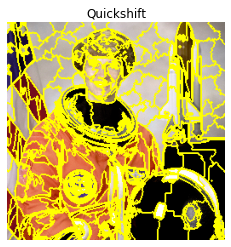

In [49]:
from skimage.util import img_as_float

img = img_as_float(skimage.data.astronaut()[::2, ::2])
segments_quick = skimage.segmentation.quickshift(
    img, kernel_size=3, max_dist=9)

print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
fig, ax = plt.subplots(figsize=(4,4), sharex=True, sharey=True)
ax.imshow(skimage.segmentation.mark_boundaries(img, segments_quick)); ax.set_title('Quickshift'); ax.set_axis_off()

# Many Segmentation Algorithms

Segmentation methods can be divided into several classes:
- Thresholding
- Region-based methods (region growing, etc)
- Clustering (k-means, GMMs, mean-shift, etc)
- **Graph-based methods (graph-cut, random walk, etc)**
- Shape based methods (active contours)
- Energe minimization methods (MRF)
- Machine learning and deep learning methods.

$\rightarrow$ we will see some of these.

# Images as Graphs

An image can be seen as a graph, where:
- Nodes: pixels
- Edges: exists when pixels are neighbors
- Affinity weight on edge $w_{pq}$: similarity between pixels $p$ and $q$, e.g. color and position.

<center><img src="figs/03_graph_nodes.png" width=500px alt="default"/></center>

<center><img src="figs/03_graph_nodes2.png" width=250px alt="default"/></center>

# Building the Graph

Which edges to include?

- Fully-connected graph:
  - Pro: Capture all pairwise similarities
  - Con: Infeasible for most images
- Neighboring pixels:
  - Pro: Fast to compute
  - Only capture very local interactions
- Neighborhood area: good tradeoff
  - Reasonable fast
  - Capture reasonable scale of interactions

# Building the Graph

Which affinity to use?

$\color{#EF5645}{\text{Affinity}}$ between two pixels $x, y$ can be generally defined as:
$$ aff(x, y) = \exp \left( - \frac{1}{2\sigma_d^2}||f(x) - f(y)||^2\right),$$

where the function $f$ can be:
- Position: $f(x) = position(x)$
- Intensity: $f(x) = intensity(x)$
- Color: $f(x) = color(x)$
- Texture: $f(x) = filterbank(x)$

Note: Can also modify the Euclidean distance metric.

Position: $f(x) = position(x)$

<center><img src="figs/03_aff1.png" width=400px alt="default"/></center>

Position: $f(x) =  intensity(x)$

<center><img src="figs/03_aff2.png" width=400px alt="default"/></center>

Position: $f(x) = color(x)$

<center><img src="figs/03_aff3.png" width=400px alt="default"/></center>

Position: $f(x) = filterbank(x)$

<center><img src="figs/03_aff4.png" width=400px alt="default"/></center>

# Segmentation as Spectral Clustering

"Graph cut": Keep clusters of points that have high similarity.


$\color{#6D7D33}{\text{Graph Cut: Method overview}}$:
- Initialization: build affinity matrix $W$
- Recursively find the "best cluster" $v$:
  - where $v[i]$ is score for pixel $i$ in cluster $v$
  - "best" is defined as: 
    - $\max_v v^T W v$ under constraint $v^Tv=1$.

<center><img src="figs/03_opt.png" width=800px alt="default"/></center>

  $\rightarrow$ "Spectral clustering" method.

# Segmentation as Spectral Clustering

"Graph cut": Keep clusters of points that have high similarity.

$\color{#6D7D33}{\text{Graph Cut: Method overview}}$:
- Initialization: build affinity matrix $W$
- Compute eigenvalues and eigenvectors of $W$
- Recursively find the "best cluster" $v$:
  - Find eigenvector $v$ of largest unprocessed eigenvalue
  - Zero all components in $v$ of pixels that have already been selected 
  - Keep components in $v$ above a threshold as cluster members.
  


# Segmentation as Graph Cuts

"Graph cut": Cut a set of edges that have low similarity.

$\color{#6D7D33}{\text{Graph Cut: Method overview}}$
- Define the cost of a cut.
- Delete edges corresponding to low cost cuts, according to a cutting strategy.

$\rightarrow$ Get a disconnected graph, which gives the segmentation.
    
<center><img src="figs/03_cost_cut.png" width=400px alt="default"/></center>

# Cost of Cut and Cutting Strategy: MinCut

MinCut: Find the minimum cut: $cut(A, B) = \sum_{p \in A, q \in B} w_{pq}.$
- either cut smallest number of edges  (unweighted edges)
- or cut edges with smallest sum of weights (weighted edges)

Drawbacks:
- cost of cuts proportional to the number of edges
- $\rightarrow$ biased towards cutting small, isolated components

<center><img src="figs/03_mincut.png" width=400px alt="default"/></center>

# Cost of Cut and Cutting Strategy: NCut

NCut: Find the normalized cut: $Ncut(A, B) = \frac{cut(A, B)}{assoc(A, V)} + \frac{cut(A, B)}{assoc(B, V)} = cut(A, B) \left( \frac{1}{\sum_{p \in A} w_{pq}} + \frac{1}{\sum_{p \in B} w_{pq}} \right).$
- $assoc(A, V)$ = sum of weights of edges in $V$ that touch $A$.

Drawbacks:
- NP-hard, but can be approximated 

# NCuts: Spectral Version

Notations:
- $W$ affinity matrix
- $D$ diagonal matrix $D(i ,i) = \sum_{j} w_{ij}$
- $z$ vector in $\left\{ -1, 1\right\}^N, z_i = 1 \Leftrightarrow i \in A$.

<center><img src="figs/03_aff_diag.png" width=200px alt="default"/></center>

After some maths, we write: $Ncut(A, B) = \frac{y^T (D-W)y}{y^T D y}, y_i \in \left\{1, -b\right\}, y^TD1 = 0$, where:
- $b$ is a scalar depending on the entries of $D$,
- $y = (1+z) - b(1-z)$ has discrete entries.

We find the (continuous) solution $y$ by solving the generalized eigenvalue problem:
$$(D - W) y = \lambda Dy$$
- for second smallest eigenvector
- give a continuous $y$ that must be converted in discrete values

Math here: https://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf

# Normalized Cut

$\color{#6D7D33}{\text{Normalized Cut: Method overview}}$:
- Initialization: build affinity matrix $W$
- Solve $(D - W)y = \lambda D y$ for smallest eigenvectors (continuous solution)
- Threshold eigenvectors to get a discrete cut
- Recursively subdivide.

# NCuts Examples

<center><img src="figs/03_ncut1.png" width=500px alt="default"/></center>

# NCuts Examples

<center><img src="figs/03_ncut2.png" width=500px alt="default"/></center>

# NCuts Pros and Cons

Pros:
- Flexible choice of affinity matrix
- Generally works better than previous methods

Cons:
- Can computationally expensive, especially with many cuts
- Bias towards balanced partitions
- Constrained by affinity model

# Many Segmentation Algorithms

Segmentation methods can be divided into several classes:
- Thresholding
- Region-based methods (region growing, etc)
- Clustering (k-means, mean-shift, etc)
- Graph-based methods (graph-cut, random walk, etc)
- Shape based methods (active contours)
- **Energe minimization methods (MRF)**
- Machine learning and deep learning methods.

$\rightarrow$ we will see some of these.

# Images as CRFs

$\color{#EF5645}{\text{Conditional Random Fields}}$ is a rich undirected probabilistic graphical model for images. Specifically, a CRF on observations $X$ and random variables $Y$ is defined as:
- Given a graph $G = (V, E)$ such that $Y = \left\{ Y_v \right\}_{v \in V}$ indexed by vertices $V$ of $G$,
- Each $Y_v$ conditioned on $X$ obeys the "Markov Property" wrt graph:
  - i.e. its probability only depends on its neighbours in $G$,
  - i.e. $P(Y_v | X, \left\{ Y_w, w \neq v \right\} ) = P(Y_v | X, \left\{ Y_w, w \sim v \right\} ) $, where $\sim$ means neighbors.
  
<center><img src="figs/03_crf.png" width=500px alt="default"/></center>

# Pixels as CRF Nodes

$\color{#6D7D33}{\text{CRF Segmentation: Method overview}}$:
- Find labels of hidden states $Y$ that maximize the probability of observing the pixels $X$

<center><img src="figs/03_crf.png" width=500px alt="default"/></center>

# CRF Segmentation: Probabilitistic View

<center><img src="figs/03_proba.png" width=500px alt="default"/></center>

<center><img src="figs/03_crf.png" width=300px alt="default"/></center>

# CRF Segmentation: Energy View

Taking the log, and dropping the constant $Z$ in the above expression gives:
$$E(x, y) = \sum_{i} \phi(x_i, y_i) + \sum_{i, j} \psi(y_i, y_j),$$
where:
- $E$ is an energy function, named from free-energy problems in statistical mechanics.
- $\phi$ are unary potential:
  - with local information about each pixel
  - how likely a pixel $x_i$ belongs to a class $y_i$
- $\psi$ are pairwise potentials:
  - Neighborhood information, enforces consistency
  - e.g. how different is a pixel from its neighbors

# CRF Segmentation: Example

Variables:
- $x_i$: Annotation (input): Foreground/Background/empty
- $y_i$: Binary variable: Foreground/Background

Unary term:
- $\phi(x_i, y_i) = K(x_i \neq y_i)$: penalty for disregarding annotation

Pairwise term:
- $\psi(y_i, y_j) = [y_i \neq y_j] w_{ij}$: encourage smooth annotation
- $w_{ij}$ is affinity between pixels $i$ and $j$

<center><img src="figs/03_crf_ex.png" width=300px alt="default"/></center>

# CRF Segmentation: Pros and Cons

Pros:
- Powerful, get global results by defining local interactions
- Very general
- Somewhat efficient

Cons:
- Only works for submodular energy functions (binary)